# Introduccion

En este proyecto, el objetivo principal es predecir las ventas de los meses del año 2018 utilizando diferentes métodos de predicción. El conjunto de datos utilizado es "Superstore", porque contiene la suficiente información sobre transacciones de ventas anteriores, lo que nos permite desarrollar modelos de predicción precisos y efectivos.

**Importancia del Proyecto**:
Este proyecto es de suma importancia para la empresa, ya que permite anticipar y planificar los ingresos generados por las ventas de productos durante el año 2018. Las predicciones precisas de ventas proporcionarán una guía valiosa para la toma de decisiones estratégicas y operativas en la empresa.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns

from datetime import datetime

import warnings

pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_excel("Dataset/Superstore.xls")

# Análisis Exploratorio de Datos

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Per unit (discount),Per unit (no discount),Sales (no discount),cost per unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,130.98,261.96,110.0232
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,243.98,731.94,170.7860
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,7.31,14.62,3.8743
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,348.21,1741.05,268.1217
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,13.98,27.96,9.9258


In [5]:
keep = ['Order Date', 'Sales']
ventas = df.loc[:,keep]
ventas.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [6]:
ventas.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [7]:
ventas.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [8]:
fecha_minima = df['Order Date'].min().strftime('%d-%m-%Y')
fecha_maxima = df['Order Date'].max().strftime('%d-%m-%Y')
print("Fecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)

Fecha mínima: 03-01-2014
Fecha máxima: 30-12-2017


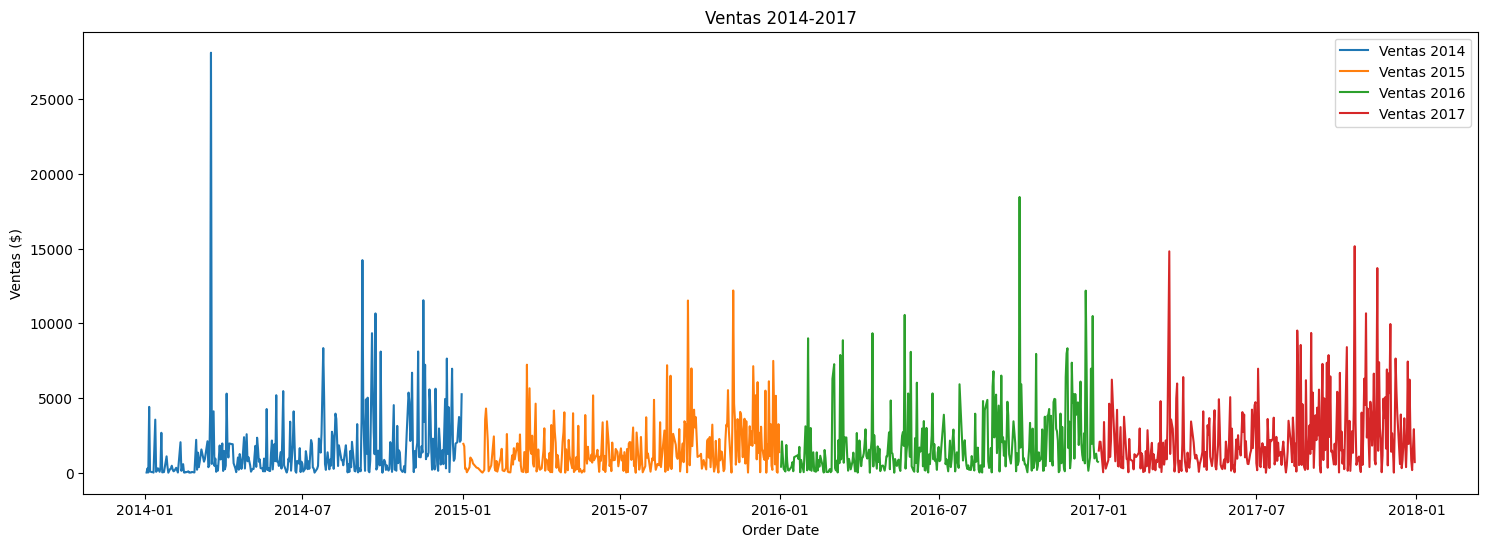

In [13]:
plt.figure(figsize=(18, 6))

for year in range(2014, 2018):
    rango_fechas = df.loc[df['Order Date'].dt.year == year]
    ventas_año = rango_fechas.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
    plt.plot(ventas_año['Order Date'], ventas_año['Sales'], label=f'Ventas {year}')

plt.title('Ventas 2014-2017')
plt.xlabel('Order Date')
plt.ylabel('Ventas ($)')
plt.legend()
plt.show()

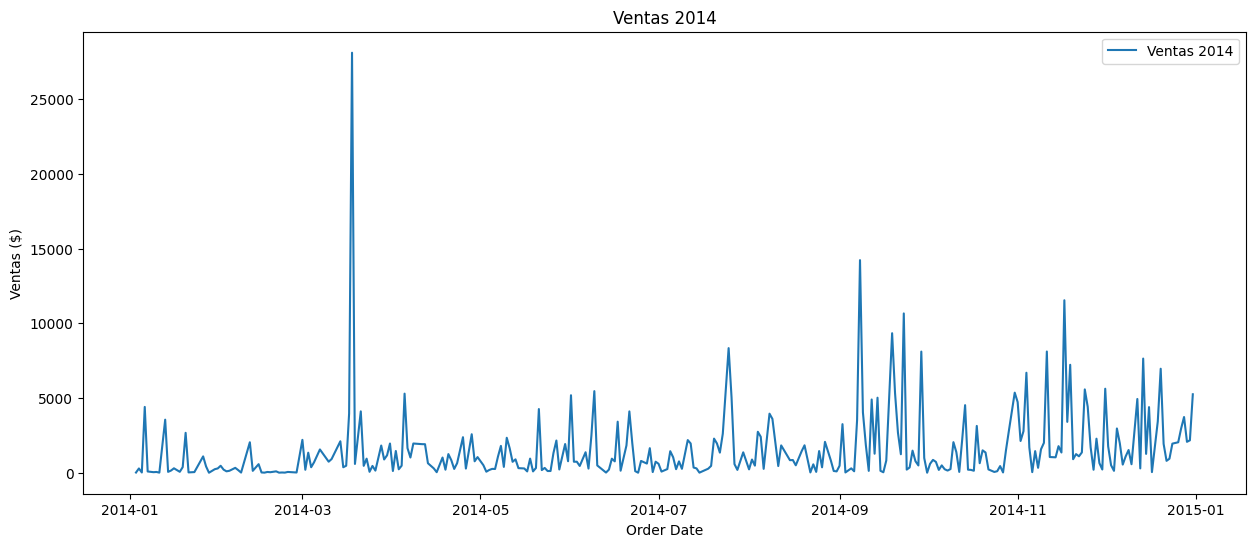

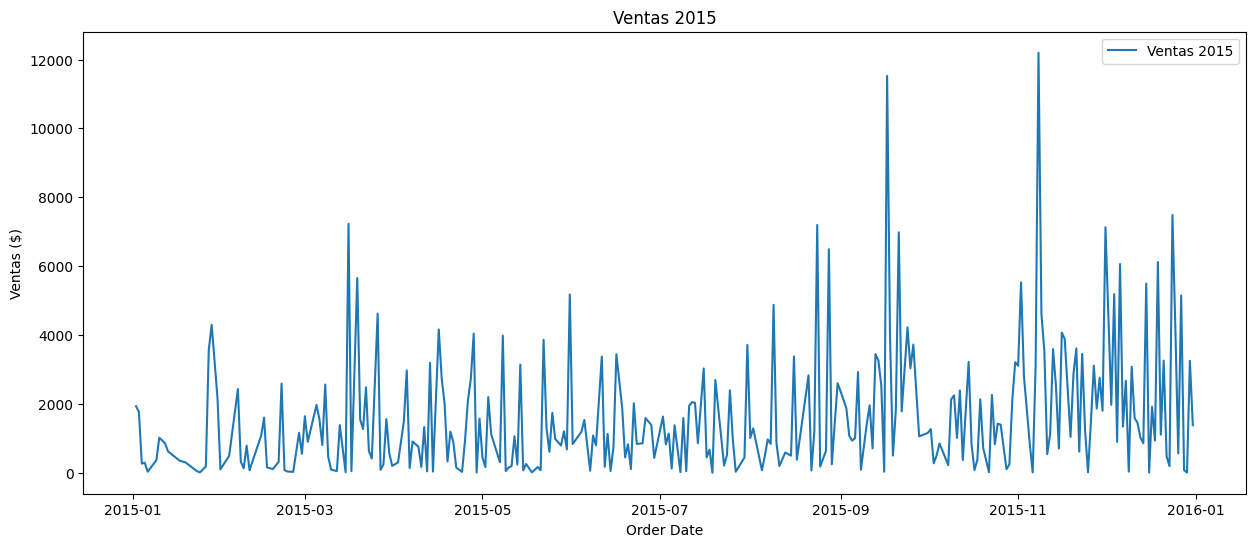

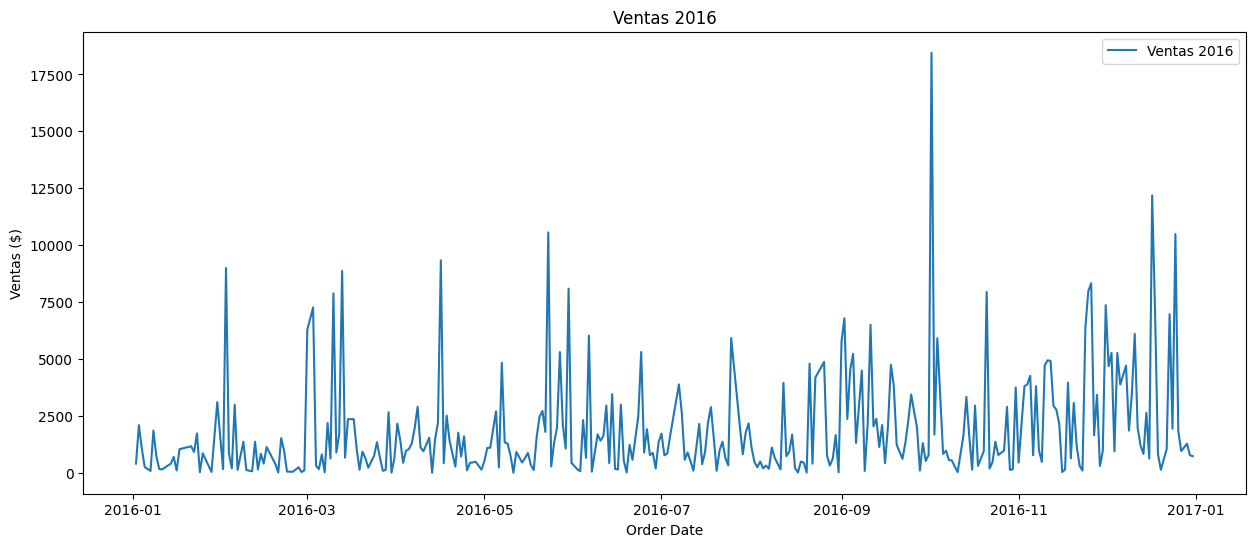

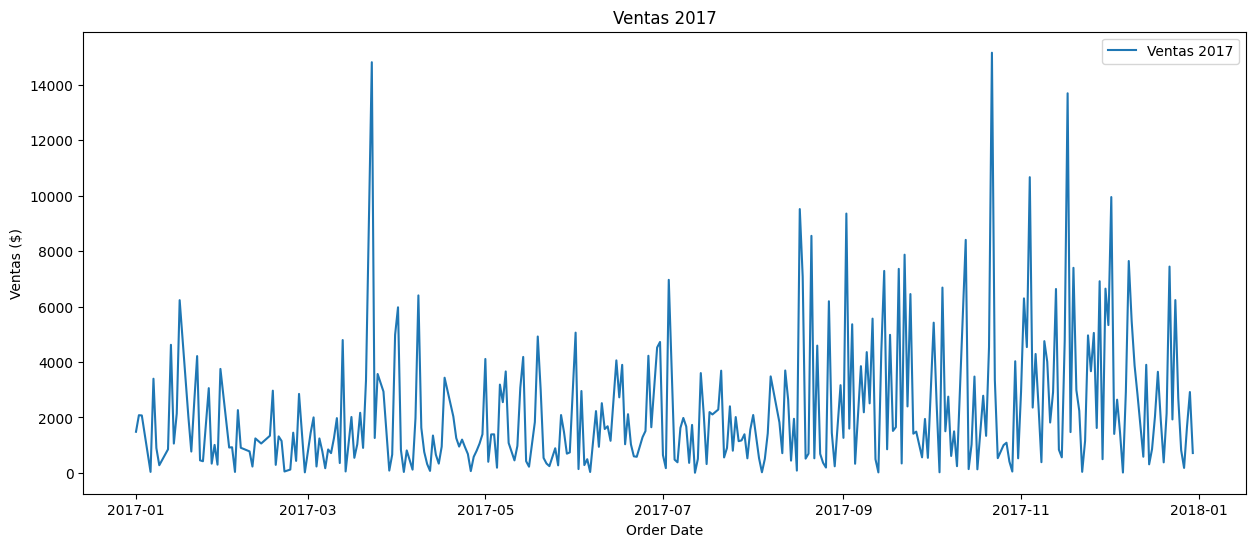

In [15]:
for year in range(2014, 2018):
    rango_fechas = df.loc[df['Order Date'].dt.year == year]
    ventas_año = rango_fechas.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
    
    plt.figure(figsize=(15, 6))
    plt.plot(ventas_año['Order Date'], ventas_año['Sales'], label=f'Ventas {year}')
    
    plt.title(f'Ventas {year}')
    plt.xlabel('Order Date')
    plt.ylabel('Ventas ($)')
    plt.legend()
    plt.show()

In [16]:
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')

In [17]:
ventas_por_mes = df.groupby('month')['Sales'].sum()
ventas_por_mes = pd.DataFrame(ventas_por_mes)
ventas_por_mes['time'] = np.arange(len(ventas_por_mes.index))
ventas_por_mes.index = ventas_por_mes.index.to_timestamp()
ventas_por_mes.head()

,Sales,time
month,,
2014-01-01,14236.895,0
2014-02-01,4519.892,1
2014-03-01,55691.009,2
2014-04-01,28295.345,3
2014-05-01,23648.287,4


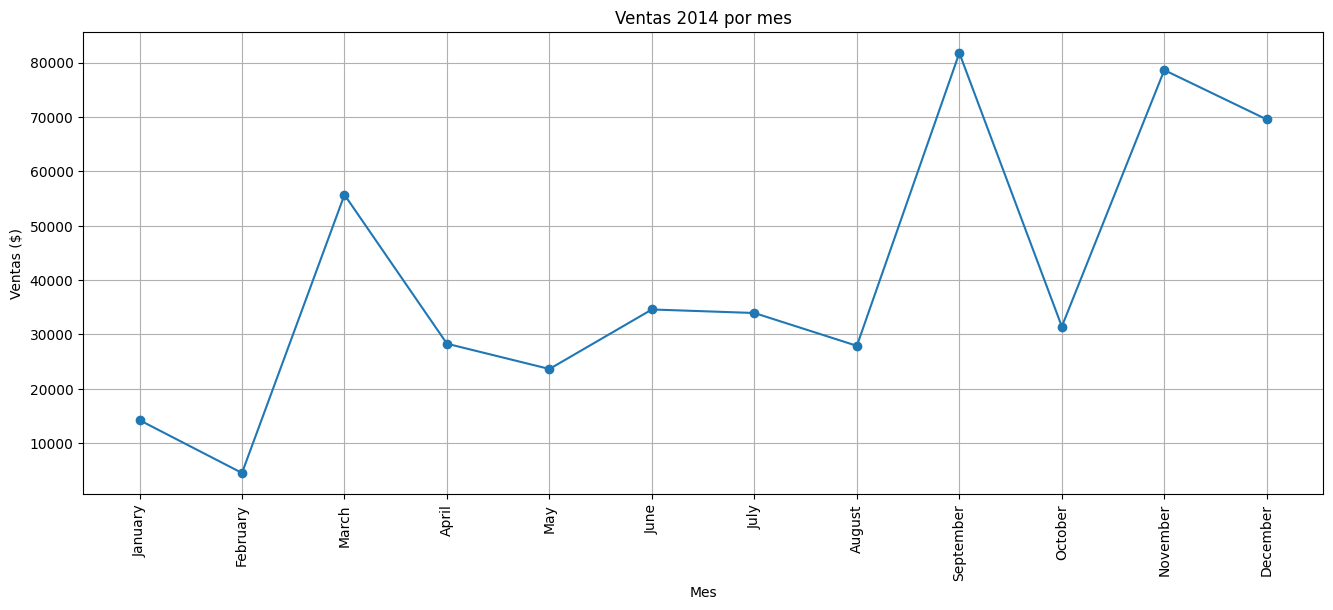

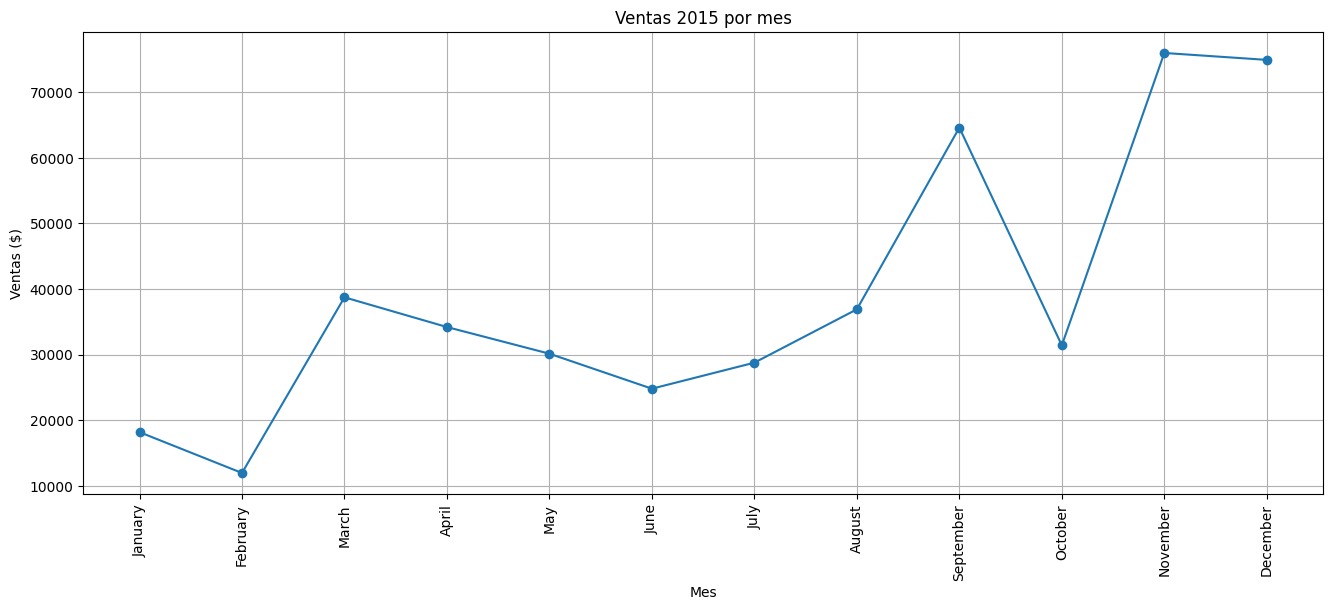

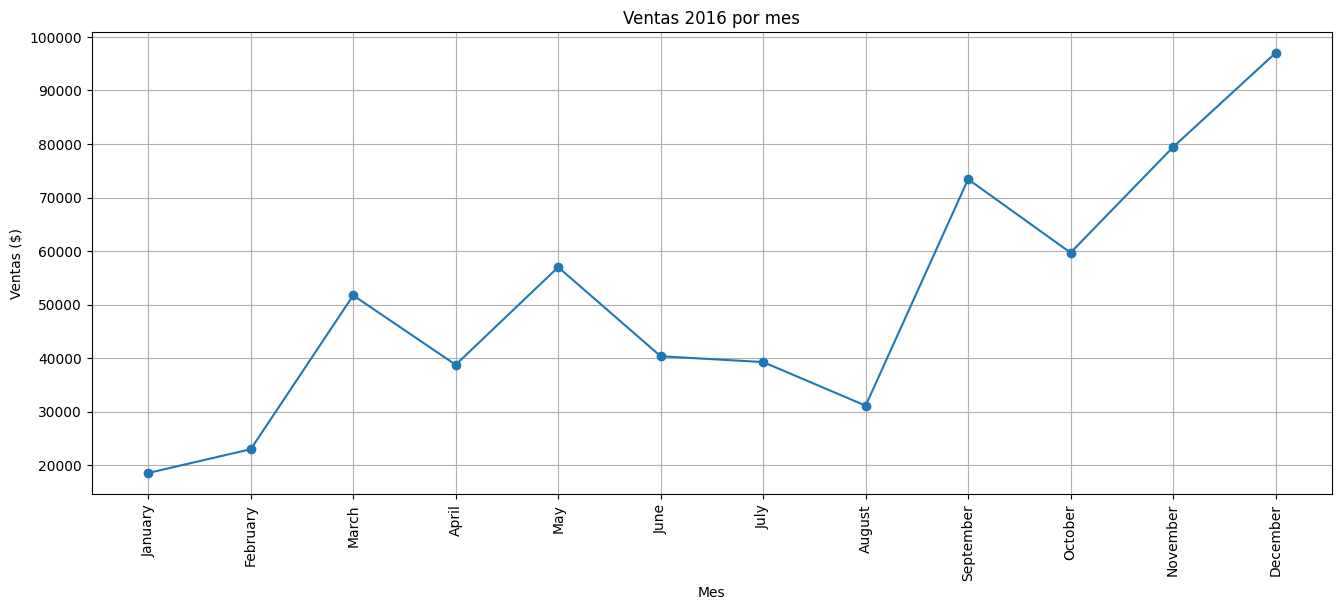

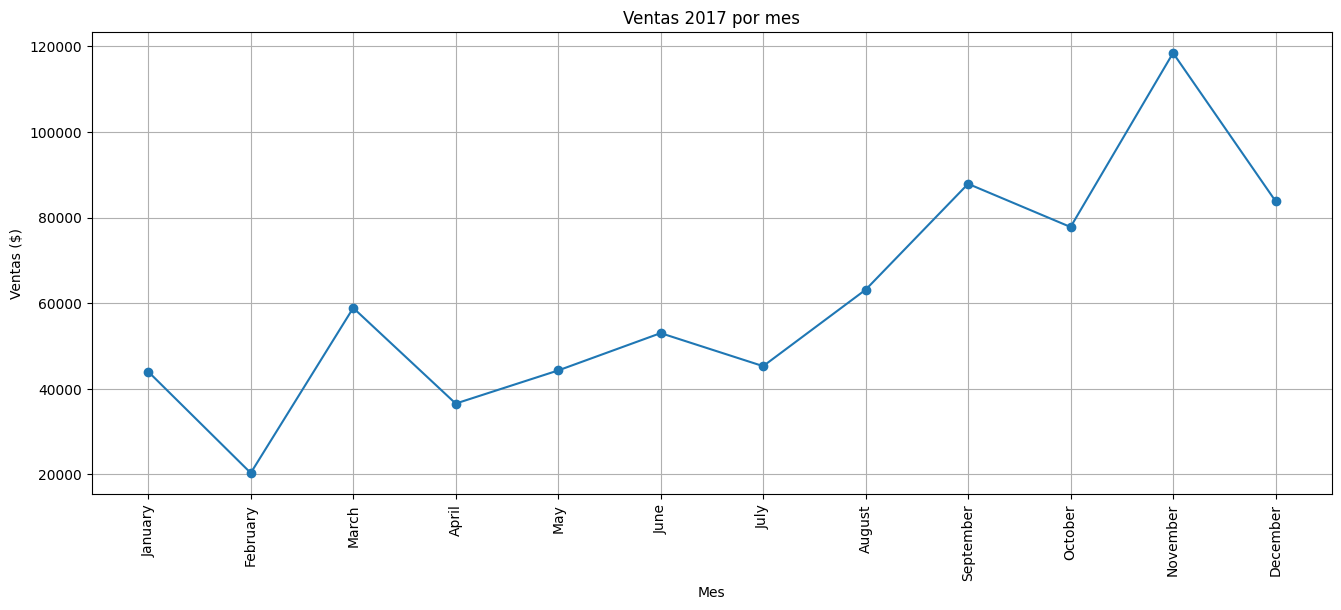

In [24]:
import calendar

for year in range(2014, 2018):
    rango_fechas2 = ventas_por_mes.loc[ventas_por_mes.index.year == year]
    ventas_por_mes_año = rango_fechas2.groupby(rango_fechas2.index.month).agg({'Sales': 'sum'}).reset_index()
    ventas_por_mes_año.columns = ['month', 'Sales']  # Renombrar las columnas para mayor claridad
    
    plt.figure(figsize=(16, 6))
    plt.plot(ventas_por_mes_año['month'], ventas_por_mes_año['Sales'], marker='o', label=f'Ventas {year}')
    
    plt.title(f'Ventas {year} por mes')
    plt.xlabel('Mes')
    plt.ylabel('Ventas ($)')
    plt.xticks(ticks=ventas_por_mes_año['month'], labels=[calendar.month_name[m] for m in ventas_por_mes_año['month']], rotation=90)
    plt.grid(True)
    plt.show()

# Predicciones

## Medidas de Evaluacion de Modelos de Regresión

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import d2_pinball_score

#### Coeficiente de determinacion ($R^2$):

$$R^2 = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

#### Error absoluto medio (MAE):

$$MAE = \frac{{1}}{{n}} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

#### Error cuadrático medio (MSE):

$$MSE = \frac{{1}}{{n}} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### Error logarítmico cuadrático medio (MSLE):

$$MSLE = \frac{{1}}{{n}} \sum_{i=1}^{n} (\log(1 + y_i) - \log(1 + \hat{y}_i))^2$$

#### Error porcentaje absoluto medio (MAPE):

$$MAPE = \frac{{1}}{{n}} \sum_{i=1}^{n} \left| \frac{{y_i - \hat{y}_i}}{{y_i}} \right|$$

#### Error absoluto mediano (MedAE):

$$Error\ absoluto\ mediano = \text{Mediana}(|y_i - \hat{y}_i|)$$

#### Error máximo (MaxError):

$$Error\ máximo = \max(|y_i - \hat{y}_i|)$$

#### Puntaje de varianza explicado (EV):

$$EV = 1 - \frac{{\text{Varianza no explicada}}}{{\text{Varianza total}}}$$

#### Pérdida de pinball media (MPPL):

$$MPPL(q) = \frac{{1}}{{n}} \sum_{i=1}^{n} \begin{cases} (1-q)(y_i - \hat{y}_i), & \text{if } y_i \geq \hat{y}_i \\ q(\hat{y}_i - y_i), & \text{if } y_i < \hat{y}_i \end{cases}$$

#### Puntuación D² de Tweedie:

$$D^2_{Tweedie} = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^{p-1}}}$$

#### Puntuación D² de pinball:

$$D^2_{Pinball}(q) = 1 - \frac{{\sum_{i=1}^{n} \left( |y_i - \hat{y}_i| - q(y_i - \hat{y}_i) \right)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

## Metodo 1: Media movil

In [26]:
df2 = df.copy()
df2.drop('Order ID',axis = 1, inplace = True)
df2['Order Date'] = pd.to_datetime(df2['Order Date'], format='%d/%m/%Y')
df2.sort_values(by=['Order Date'], inplace=True, ascending=True)
df2.set_index('Order Date', inplace = True)

ventas_por_dia = pd.DataFrame(df2['Sales'])
ventas_por_dia =  pd.DataFrame(ventas_por_dia['Sales'].resample('D').sum())
ventas_por_dia.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


#### Por mes

Tamaño de la ventana y suavizado: Un tamaño de ventana más grande en un promedio móvil resulta en un suavizado más pronunciado, ya que implica el promediado de más puntos de datos. Esto puede ser útil para eliminar el ruido presente en los datos y destacar tendencias de largo plazo. No obstante, un tamaño de ventana excesivamente grande puede llevar a la pérdida de detalles importantes en los datos.

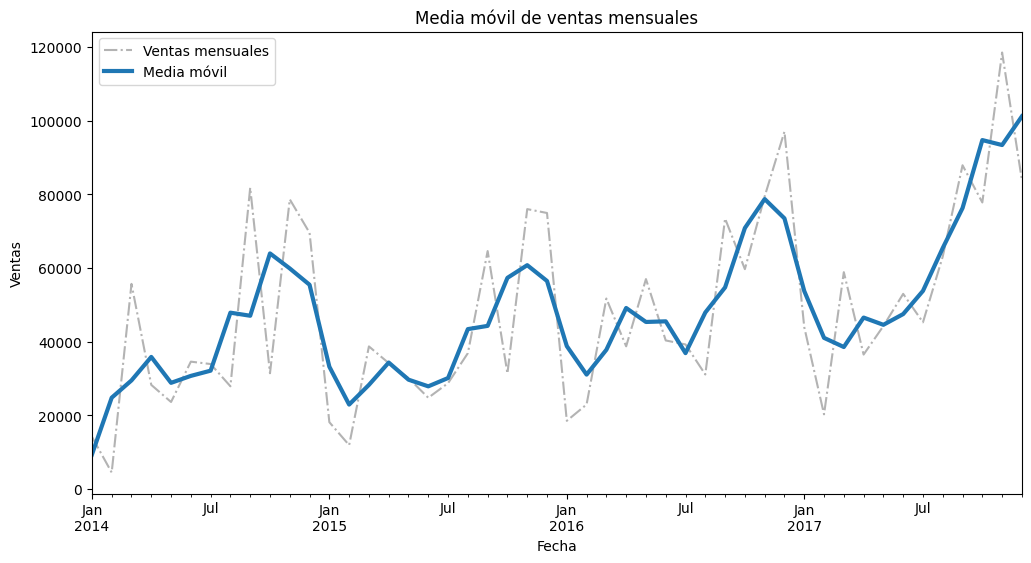

In [27]:
media_movil = ventas_por_mes['Sales'].rolling(window=3, center=True, min_periods=1).mean()

plt.figure(figsize=(12, 6))

ax = ventas_por_mes['Sales'].plot(style="-.", color="0.7", label='Ventas mensuales')

media_movil.plot(ax=ax, linewidth=3, label='Media móvil')

plt.title('Media móvil de ventas mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

plt.show()

In [28]:
ventana = 3
horizonte = 7

rango_pronostico = pd.date_range(start=ventas_por_mes.index[-1] + pd.DateOffset(months=1), periods=horizonte, freq='MS')

ventana_movil = ventas_por_mes["Sales"][-ventana:].values

pronosticos = []

for t in range(horizonte):
    pronostico = ventana_movil.mean()
    pronosticos.append(pronostico)
    ventana_movil = np.append(ventana_movil[1:], pronostico)

for fecha_pronostico, pronostico in zip(rango_pronostico, pronosticos):
    print('Fecha: {}, Pronóstico: {:.2f}'.format(fecha_pronostico.strftime('%m-%Y'), pronostico))

Fecha: 01-2018, Pronóstico: 93351.36
Fecha: 02-2018, Pronóstico: 98542.83
Fecha: 03-2018, Pronóstico: 91907.84
Fecha: 04-2018, Pronóstico: 94600.67
Fecha: 05-2018, Pronóstico: 95017.11
Fecha: 06-2018, Pronóstico: 93841.88
Fecha: 07-2018, Pronóstico: 94486.55


#### Por día

In [29]:
ventana = 3
horizonte = 7

rango_pronostico = pd.date_range(start=ventas_por_dia.index[-1] + pd.DateOffset(days=1), periods=horizonte)
ventana_movil = ventas_por_dia["Sales"][-ventana:].values
pronosticos = []

for t in range(horizonte):
    pronostico = ventana_movil.mean()
    pronosticos.append(pronostico)
    ventana_movil = np.append(ventana_movil[1:], pronostico)
for fecha_pronostico, pronostico in zip(rango_pronostico, pronosticos):
    print('Fecha: {}, Pronóstico: {:.2f}'.format(fecha_pronostico.strftime('%d-%m-%Y'), pronostico))

Fecha: 31-12-2017, Pronóstico: 1762.22
Fecha: 01-01-2018, Pronóstico: 1797.18
Fecha: 02-01-2018, Pronóstico: 1424.40
Fecha: 03-01-2018, Pronóstico: 1661.27
Fecha: 04-01-2018, Pronóstico: 1627.62
Fecha: 05-01-2018, Pronóstico: 1571.10
Fecha: 06-01-2018, Pronóstico: 1619.99


## Metodo 2: Suavizado Exponencial

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [31]:
horizonte = 7

In [32]:
ultimo_indice_tiempo = ventas_por_dia.index[-1]
rango_pronostico = pd.date_range(start=ultimo_indice_tiempo, periods=horizonte+1, freq=ventas_por_dia.index.freq)[1:]

### Suavizado exponencial por día

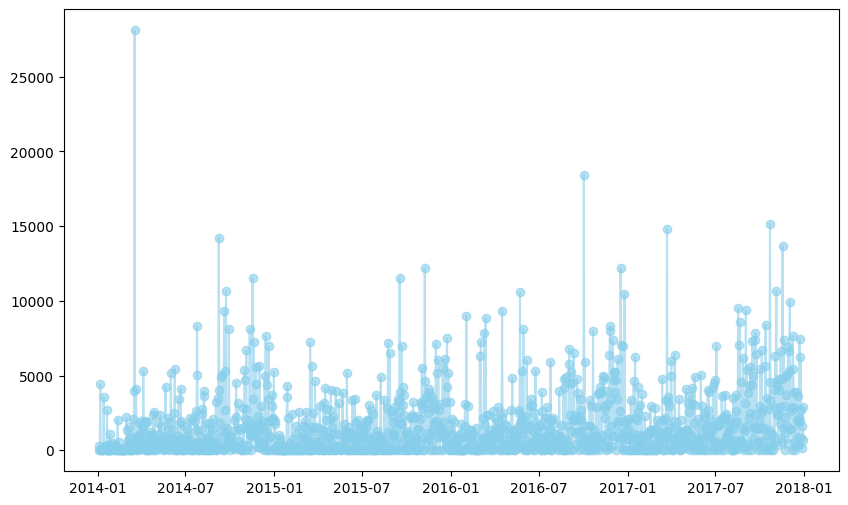

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_dia.index, ventas_por_dia["Sales"], color="skyblue", alpha=0.6, marker="o")
plt.show()

In [34]:
ses = SimpleExpSmoothing(ventas_por_dia["Sales"])
model = ses.fit()
forecast = model.forecast(horizonte)

print("Factor de suavizacion (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (1_0) = ", model.params["initial_level"])
print("Pronostico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

Factor de suavizacion (alfa) = 0.03953488372093023
Nivel inicial (1_0) =  16.448
Pronostico (y_{T+h|T}) =  2836.3406612133026


c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [35]:
forecast.round()

2017-12-31    2836.0
2018-01-01    2836.0
2018-01-02    2836.0
2018-01-03    2836.0
2018-01-04    2836.0
2018-01-05    2836.0
2018-01-06    2836.0
Freq: D, dtype: float64

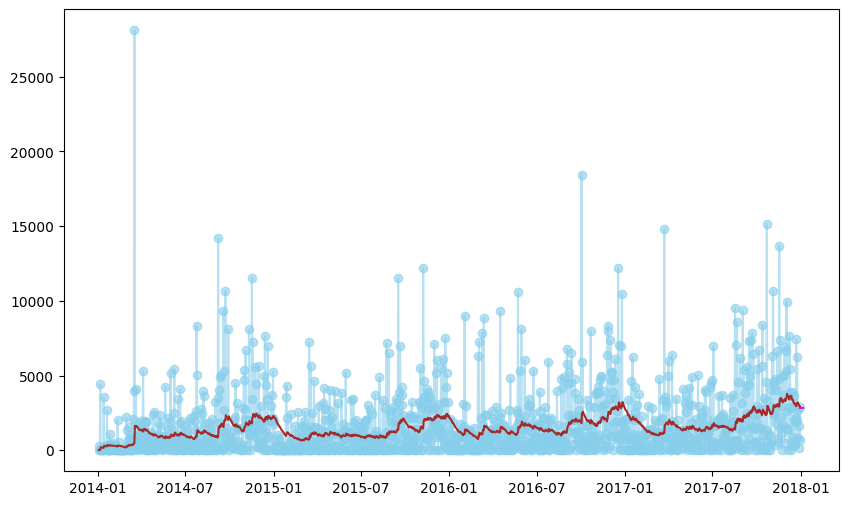

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_dia.index, ventas_por_dia["Sales"], color="skyblue", alpha=0.6, marker="o")
ax.plot(rango_pronostico, forecast, color="magenta")

ax.plot(ventas_por_dia.index, model.fittedvalues, color="brown")

plt.show()

### Suavizado exponencial por mes

In [37]:
horizonte = 7

In [39]:
ultimo_indice_tiempo = ventas_por_mes.index[-1]
rango_pronostico = pd.date_range(start=ultimo_indice_tiempo, periods=horizonte+1, freq=ventas_por_mes.index.freq)[1:]

In [41]:
ses = SimpleExpSmoothing(ventas_por_mes["Sales"])
model = ses.fit()
forecast = model.forecast(horizonte)

print("Factor de suavizacion (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (1_0) = ", model.params["initial_level"])
print("Pronostico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

Factor de suavizacion (alfa) = 0.32732558139534884
Nivel inicial (1_0) =  14236.895
Pronostico (y_{T+h|T}) =  84558.21083930897


c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
forecast

2018-01-01    84558.210839
2018-02-01    84558.210839
2018-03-01    84558.210839
2018-04-01    84558.210839
2018-05-01    84558.210839
2018-06-01    84558.210839
2018-07-01    84558.210839
Freq: MS, dtype: float64

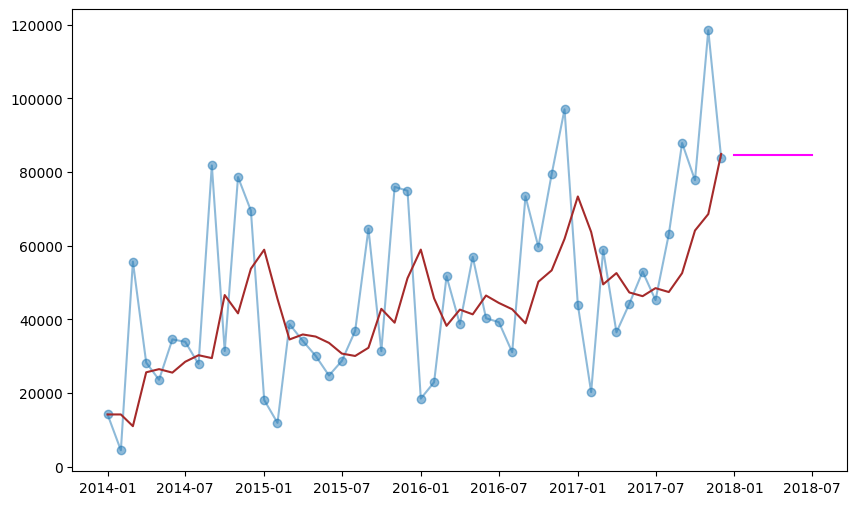

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_mes.index, ventas_por_mes["Sales"], marker="o", alpha=0.5)
ax.plot(rango_pronostico, forecast, color="magenta")
ax.plot(ventas_por_mes.index, model.fittedvalues, color="brown")

plt.show()

La media móvil y el suavizado exponencial pueden ser útiles para suavizar los datos y proporcionar una visión general de las tendencias a lo largo del tiempo, pueden no ser los métodos más adecuados para predecir ventas, especialmente en entornos comerciales dinámicos y complejos. En su lugar, pueden ser más apropiados modelos de pronóstico más sofisticados que puedan capturar mejor la complejidad de los datos y las relaciones subyacentes entre las variables. Por esto mismo, quedan descartados estos metodos.

## ¿La serie de datos es estacionaria?

### Metodo 1: determinar la estacionalidad utilizando la media y la varianza

Cuando comparas la media y la varianza de distintas partes de la serie, puedes notar si hay patrones regulares de estacionalidad en los datos. Por ejemplo, si la media y la varianza se mantienen relativamente constantes en diferentes momentos, esto podría sugerir una estacionalidad constante en los datos.

In [44]:
ventas_mes = df.groupby('month')['Sales'].sum()
ventas_mes = pd.DataFrame(ventas_mes)

In [50]:
# Divide el conjunto de datos ventas_mes['Sales'] en tres partes: entrenamiento (train), prueba (test) y validación (validate).
train, test, validate = np.split(ventas_mes['Sales'].sample(frac=1), [int(.6*len(ventas_mes['Sales'])),int(.8*len(ventas_mes['Sales']))])

In [46]:
print('Train Dataset')
print(train)

Train Dataset
month
2015-06    24797.2920
2017-02    20301.1334
2016-09    73410.0249
2014-03    55691.0090
2015-02    11951.4110
2015-09    64595.9180
2017-08    63120.8880
2016-06    40344.5340
2016-07    39261.9630
2014-06    34595.1276
2014-07    33946.3930
2017-01    43971.3740
2017-03    58872.3528
2015-04    34195.2085
2015-01    18174.0756
2015-12    74919.5212
2015-05    30131.6865
2014-04    28295.3450
2017-06    52981.7257
2015-03    38726.2520
2016-11    79411.9658
2015-08    36898.3322
2017-10    77776.9232
2017-07    45264.4160
2016-02    22978.8150
2016-05    56987.7280
2014-08    27909.4685
2015-11    75972.5635
Freq: M, Name: Sales, dtype: float64


In [47]:
print('Test Dataset')
print(test)

Test Dataset
month
2016-12    96999.0430
2016-08    31115.3743
2017-04    36521.5361
2014-09    81777.3508
2016-01    18542.4910
2016-10    59687.7450
2014-12    69545.6205
2017-05    44261.1102
2014-10    31453.3930
2016-04    38750.0390
Freq: M, Name: Sales, dtype: float64


In [48]:
print('Validate Dataset')
print(validate)

Validate Dataset
month
2015-10     31404.9235
2017-11    118447.8250
2015-07     28765.3250
2017-09     87866.6520
2017-12     83829.3188
2016-03     51715.8750
2014-01     14236.8950
2014-05     23648.2870
2014-02      4519.8920
2014-11     78628.7167
Freq: M, Name: Sales, dtype: float64


In [53]:
media_1, media_2, media_3 = train.mean(), test.mean(), validate.mean()
var_1, var_2, var_3 = train.var(), test.var(), validate.var()

print('Media:')
print(media_1.round(), media_2.round(), media_3.round())
print('Varianza:')
print(var_1.round(), var_2.round(), var_3.round())

Media:
49065.0 48413.0 43924.0
Varianza:
539505085.0 1188581057.0 486066472.0


La media no difiere tanto entre los periodos, la varianza muestra fluctuacions considerables. Probemos otros métodos.

### Metodo 2: Test Dicky Fuller

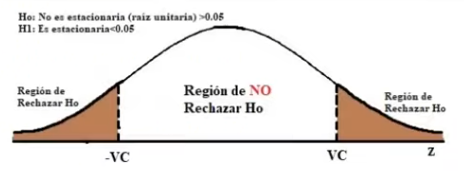

*Prueba de Dickey-Fuller Aumentada*: si es menor a 0.05 entonces la serie es estacionaria.

*ADF* = El valor de la estadística ADF (Augmented Dickey-Fuller) es una medida de la evidencia en contra de la presencia de una raíz unitaria en una serie temporal. Si el valor de ADF es muy negativo, como en tu ejemplo de -20, significa que hay una fuerte evidencia en contra de la hipótesis nula de que la serie tiene una raíz unitaria y, por lo tanto, implica que la serie es estacionaria.

In [54]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(ventas_mes) 

print(adf)
print('\nADF = ', str(adf[0]))
print('\nValor-p = ', str(adf[1]))
print('\nValores críticos: ')

for key, val in adf[4].items():
    print(key,':',val)
    if adf[1] < 0.05:
        print('\nHipótesis Nula Rechazada. La Serie Temporal es Estacionaria')
    else:
        print('\nHipótesis Nula Aceptada. La Serie Temporal no es Estacionaria')

(-4.493767844002668, 0.00020180198458237563, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 848.774903223632)

ADF =  -4.493767844002668

Valor-p =  0.00020180198458237563

Valores críticos: 
1% : -3.5778480370438146

Hipótesis Nula Rechazada. La Serie Temporal es Estacionaria
5% : -2.925338105429433

Hipótesis Nula Rechazada. La Serie Temporal es Estacionaria
10% : -2.6007735310095064

Hipótesis Nula Rechazada. La Serie Temporal es Estacionaria


### Metodo 3: Descomposicion estacional

La descomposición estacinal es una técnica para el análisis de series temporales para separar una serie temporar en tres partes: tendencia, estacionalidad y residuos.

In [56]:
ventas_por_mes_sin_indice = ventas_por_mes.drop('time', axis=1)

#### Descomposición clásica

La idea de la descomposición clásica es expresar la serie de tiempo ($y(t)$) como una combinación de tres componentes:

- $S(t)$: estacionalidad
- $T(t)$: tendencia
- $R(t)$: residual (componente de error asociado a la descomposición)

La lógica de funcionamiento de estos métodos es sencilla:

1. Se usa la media móvil para estimar $T(t)$
2. Se usa la media móvil o suavizado exponencial para estimar $S(t)$
3. $R(t)$ se calcula a partir de la serie original ($y(t)$) y de los componentes $T(t)$ y $S(t)$ estimados en (1) y (2)

- *Descomposición aditiva*:

$$y(t) = S(t) + T(t) + R(t)$$

Esta descomposición es "adecuada" cuando la magnitud del componente estacional **se mantiene relativamente** constante a pesar de la tendencia.

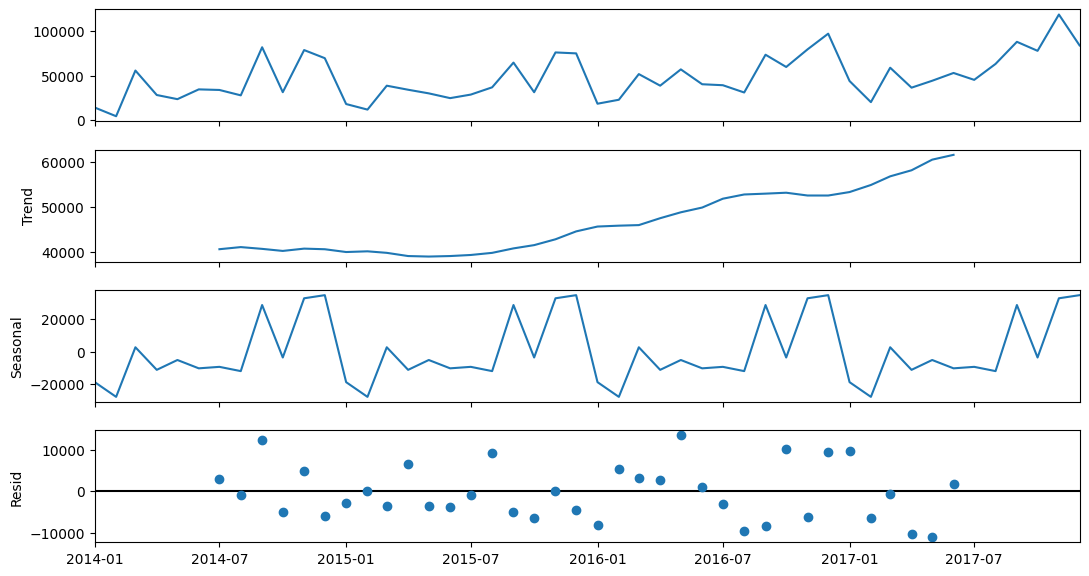

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

ventas_aditiva = seasonal_decompose(ventas_por_mes_sin_indice, model='additive')

fig = ventas_aditiva.plot()
fig.set_size_inches((12,6))
plt.show()

- *Descomposición multiplicativa*:

$$y(t) = S(t) \cdot T(t) \cdot R(t)$$

Esta descomposición es "adecuada" cuando la magnitud del componente estacional **cambia proporcionalmente** con la tendencia.

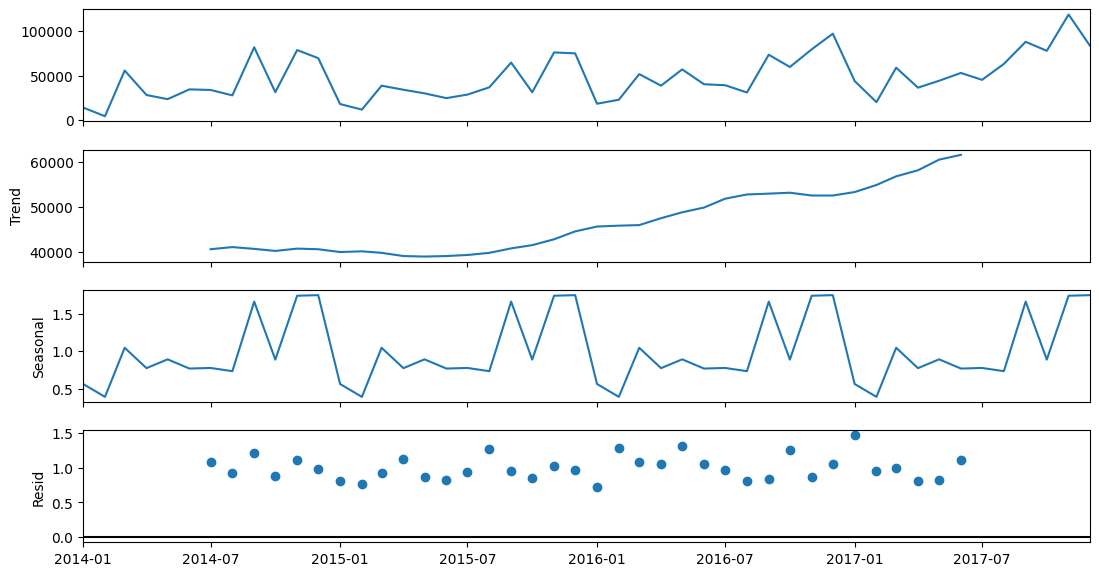

In [60]:
ventas_multiplicativa = seasonal_decompose(ventas_por_mes_sin_indice,model='multiplicative')
fig = ventas_multiplicativa.plot()
fig.set_size_inches((12,6))
plt.show()

#### Descomposición STL

Esta técnica, conocida como "Descomposición Estacional y de Tendencia utilizando Loess", se centra en dividir una serie temporal en sus componentes fundamentales: tendencia, estacionalidad y residuos. A diferencia de los enfoques tradicionales, este método emplea una estrategia más avanzada para este propósito.

La metodología básica de esta técnica implica los siguientes pasos:

1. se calcula la estacionalidad de la serie utilizando un método llamado "regresión local (Loess)". En este proceso, se promedian los datos vecinos para cada punto de la serie, considerando un número determinado de puntos (denominado "N"), que suele estar relacionado con la periodicidad esperada de la serie.

2. Después de estimar la estacionalidad, se elimina esta componente de la serie original, lo que resulta en la tendencia y el ruido de la serie.

3. Luego, se aplica nuevamente el método Loess a la serie resultante del paso anterior, utilizando un valor de "N" diferente al utilizado en la estimación de la estacionalidad. Esto permite identificar las variaciones a largo plazo en la serie, es decir, la tendencia.

4. Finalmente, los residuos se obtienen restando la estacionalidad (calculada en el paso 1) y la tendencia (calculada en el paso 3) de la serie original.

In [55]:
from statsmodels.tsa.seasonal import STL

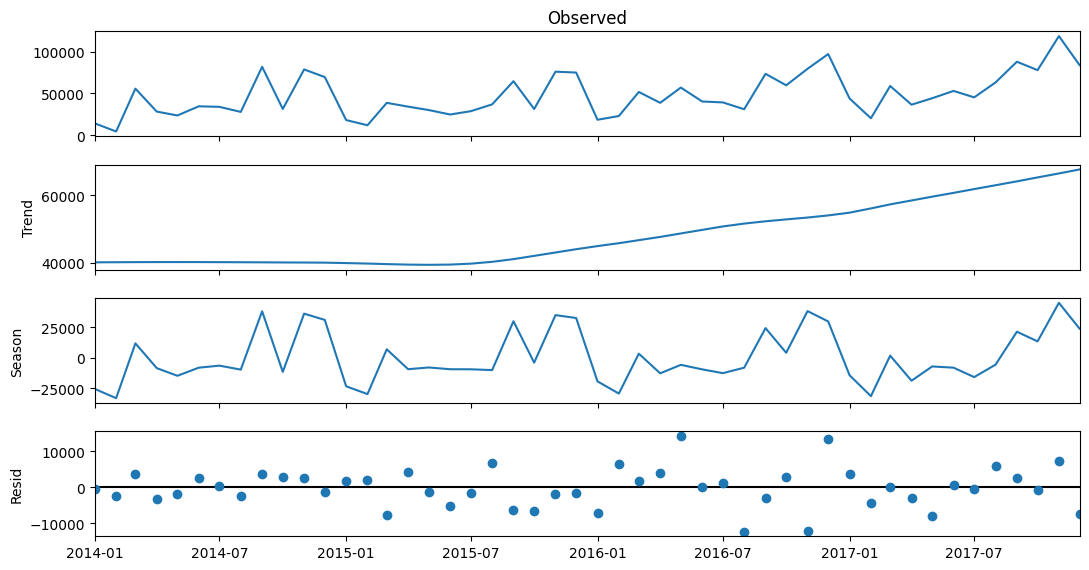

In [57]:
ventas_STL = STL(ventas_por_mes_sin_indice).fit()
fig = ventas_STL.plot()
fig.set_size_inches((12,6))
plt.show()

In [63]:
print(f'Promedio residuales descomposición STL: {ventas_STL.resid.mean()}')
print(f'Promedio residuales descomposición aditiva: {ventas_aditiva.resid.mean()}')
print(f'Promedio residuales descomposición multiplicativa: {ventas_multiplicativa.resid.mean()}')

Promedio residuales descomposición STL: -206.5770537287414
Promedio residuales descomposición aditiva: -360.0099112268491
Promedio residuales descomposición multiplicativa: 0.9984552789093115


Observamos que la descomposición multiplicativa es la más adecuada para nuestros datos. Al analizar el gráfico estacional, donde podemos apreciar que la forma de la serie se repite de manera consistente cada año. Además, los otros dos métodos utilizados previamente sugieren la presencia de una tendencia en la serie.

## Metodo 3: SARIMA

El método SARIMA (Seasonal Autoregressive Integrated Moving Average) es una técnica avanzada de modelado de series temporales que se utiliza para pronosticar y analizar datos que muestran estacionalidad.

El método SARIMA incorpora términos adicionales en el modelo ARIMA para capturar la estacionalidad en los datos. Estos términos incluyen los componentes SAR (Seasonal Autoregressive) y SMA (Seasonal Moving Average), que modelan la dependencia de los datos en períodos anteriores y los errores pasados, respectivamente, a lo largo de las estaciones.

In [64]:
# p = es el orden del componenete autoregresivo (AR)
# d = es el orden de diferenciacion
# q = es el orden del componenete de media movil (MA)

p = d = q = range(0, 2) 
pdq = [(x, y, z) for x in p for y in d for z in q]
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in pdq]
print('Ejemplos de combinaciones de parámetros para ARIMA estacional:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Ejemplos de combinaciones de parámetros para ARIMA estacional:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


Este código busca iterativamente a través de todas las combinaciones posibles de parámetros SARIMA y ajusta un modelo SARIMA para cada combinación, registrando el modelo con el menor AIC. Esto permite identificar el mejor modelo SARIMA que se ajusta a los datos de ventas.

In [65]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

warnings.filterwarnings("ignore")

best_aic = float('inf')

for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(ventas_mes['Sales'],
                                            order=parameters,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            current_aic = results.aic
            if current_aic < best_aic:
                best_model = results
                best_aic = current_aic
                best_parameters = parameters
                best_seasonal_param = seasonal_param
        except:
            continue

print('Mejor modelo SARIMA:', best_model)
print('Parámetros del mejor modelo:', best_parameters)
print('Parámetros estacionales del mejor modelo:', best_seasonal_param)
print('AIC del mejor modelo:', best_aic)

Mejor modelo SARIMA: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000016F6054D1F0>
Parámetros del mejor modelo: (0, 1, 1)
Parámetros estacionales del mejor modelo: (0, 1, 1, 12)
AIC del mejor modelo: 465.50006045517824


In [68]:
warnings.filterwarnings("ignore")

mod = sm.tsa.statespace.SARIMAX(ventas_mes,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -229.750
Date:                            Sat, 18 May 2024   AIC                            465.500
Time:                                    13:50:27   BIC                            468.634
Sample:                                01-31-2014   HQIC                           466.180
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9373      0.139     -6.723      0.000      -1.211      -0.664
ma.S.L12      -0.3912      0.274   

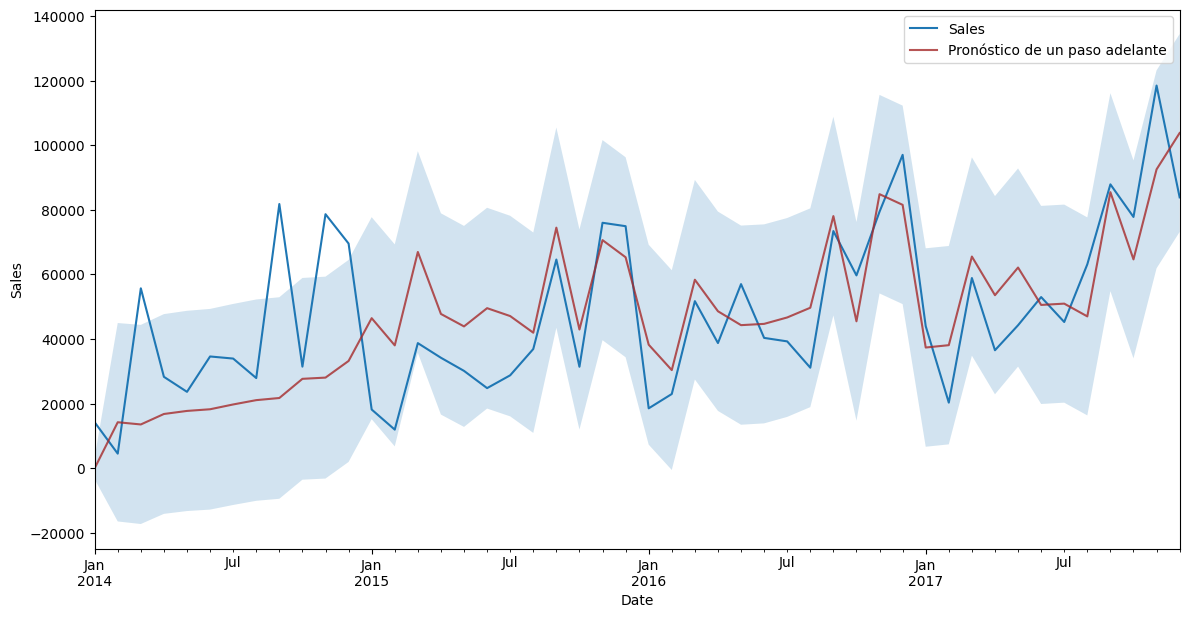

In [69]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-03'), dynamic=False)
pred_val = pred.conf_int()
ax = ventas_mes['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Pronóstico de un paso adelante', color="brown", alpha=.8, figsize=(14, 7))
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [70]:
prediccion_futura = results.get_forecast(steps=10)
print(prediccion_futura.summary_frame())

Sales            mean       mean_se  mean_ci_lower  mean_ci_upper
2018-01  52477.992383  15623.880089   21855.750110   83100.234656
2018-02  38167.151567  15655.318095    7483.291934   68851.011201
2018-03  72866.003426  15686.026221   42121.956972  103610.049879
2018-04  54758.647866  15716.696202   23954.489354   85562.806378
2018-05  63273.417245  15747.331059   32409.215517   94137.618973
2018-06  64527.960112  15777.934097   33603.777531   95452.142694
2018-07  59925.094696  15808.508961   28940.986482   90909.202909
2018-08  69399.053910  15839.059681   38355.067385  100443.040434
2018-09  99087.314489  15869.590731   67983.488207  130191.140771
2018-10  84744.269661  15900.107085   53580.632424  115907.906898


<Axes: >

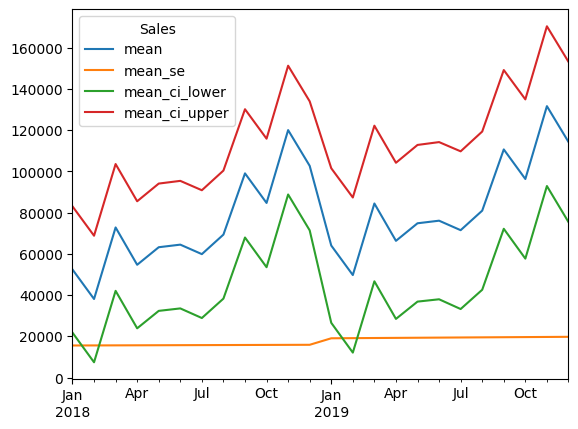

In [71]:
prediccion_futura = results.get_forecast(steps=24)
prediccion_futura.summary_frame().plot()

In [72]:
prediccion_futura.summary_frame().tail(24)

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2018-01,52477.992383,15623.880089,21855.750110,83100.234656
2018-02,38167.151567,15655.318095,7483.291934,68851.011201
2018-03,72866.003426,15686.026221,42121.956972,103610.049879
2018-04,54758.647866,15716.696202,23954.489354,85562.806378
2018-05,63273.417245,15747.331059,32409.215517,94137.618973
2018-06,64527.960112,15777.934097,33603.777531,95452.142694
2018-07,59925.094696,15808.508961,28940.986482,90909.202909
2018-08,69399.053910,15839.059681,38355.067385,100443.040434
2018-09,99087.314489,15869.590731,67983.488207,130191.140771
2018-10,84744.269661,15900.107085,53580.632424,115907.906898


In [73]:
y_forecasted = pred.predicted_mean
y_truth = ventas_mes['Sales']

<Axes: xlabel='month'>

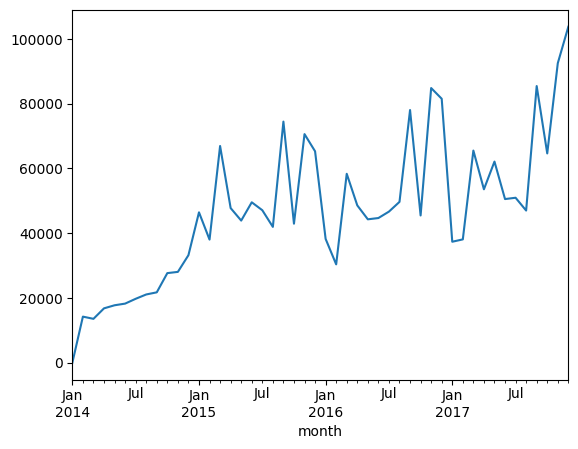

In [74]:
y_forecasted.plot()

In [75]:
from math import sqrt

r2 = r2_score(y_forecasted, y_truth)
mae = mean_absolute_error(y_forecasted, y_truth)
mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_forecasted, y_truth)
medae = median_absolute_error(y_forecasted, y_truth)
me = max_error(y_forecasted, y_truth)
evs = explained_variance_score(y_forecasted, y_truth)
mpl = mean_pinball_loss(y_forecasted, y_truth)
d2t = d2_tweedie_score(y_forecasted, y_truth)
d2p = d2_pinball_score(y_forecasted, y_truth)

print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse))
print("Raíz del Error Cuadrático Medio (RMSE): {:.2f}".format(rmse))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae))
print("Error Máximo (ME): {:.2f}".format(me))
print("Varianza Explicada (EVS): {:.2f}".format(evs))
print("Pérdida Media de Pinball (MPL): {:.2f}".format(mpl))
print("Puntuación Tweedie D^2 (D2T): {:.2f}".format(d2t))
print("Puntuación de Pinball D^2 (D2P): {:.2f}".format(d2p))

R2 Score (Coeficiente de determinación): 0.24
Error Absoluto Medio (MAE): 15498.95
Error Cuadrático Medio (MSE): 384216004.96
Raíz del Error Cuadrático Medio (RMSE): 19601.43
Error Porcentual Absoluto Medio (MAPE): 1335776562852351744.00
Error Absoluto Mediano (MEDAE): 13347.75
Error Máximo (ME): 60037.84
Varianza Explicada (EVS): 0.24
Pérdida Media de Pinball (MPL): 7749.48
Puntuación Tweedie D^2 (D2T): 0.24
Puntuación de Pinball D^2 (D2P): 0.09


Estos resultados indican que el modelo de predicción no está capturando adecuadamente la estructura de los datos de ventas y está produciendo predicciones inexactas y poco fiables.

## Metodo 4: Regresion lineal

### Regresion lineal: primera manera

El código realiza una regresión lineal donde traza la línea de tendencia de regresión para diferentes órdenes polinomiales en los datos de ventas mensuales. Esto permite visualizar cómo cambia la forma de la línea de tendencia a medida que se ajusta a los datos con diferentes niveles de complejidad.

Un modelo con un orden muy alto puede ajustarse demasiado a los datos de entrenamiento, capturando no solo la verdadera relación entre las variables, sino también el ruido aleatorio en los datos. Provocando una pérdida de generalización, lo que significa que el modelo puede tener un rendimiento deficiente al predecir datos nuevos.

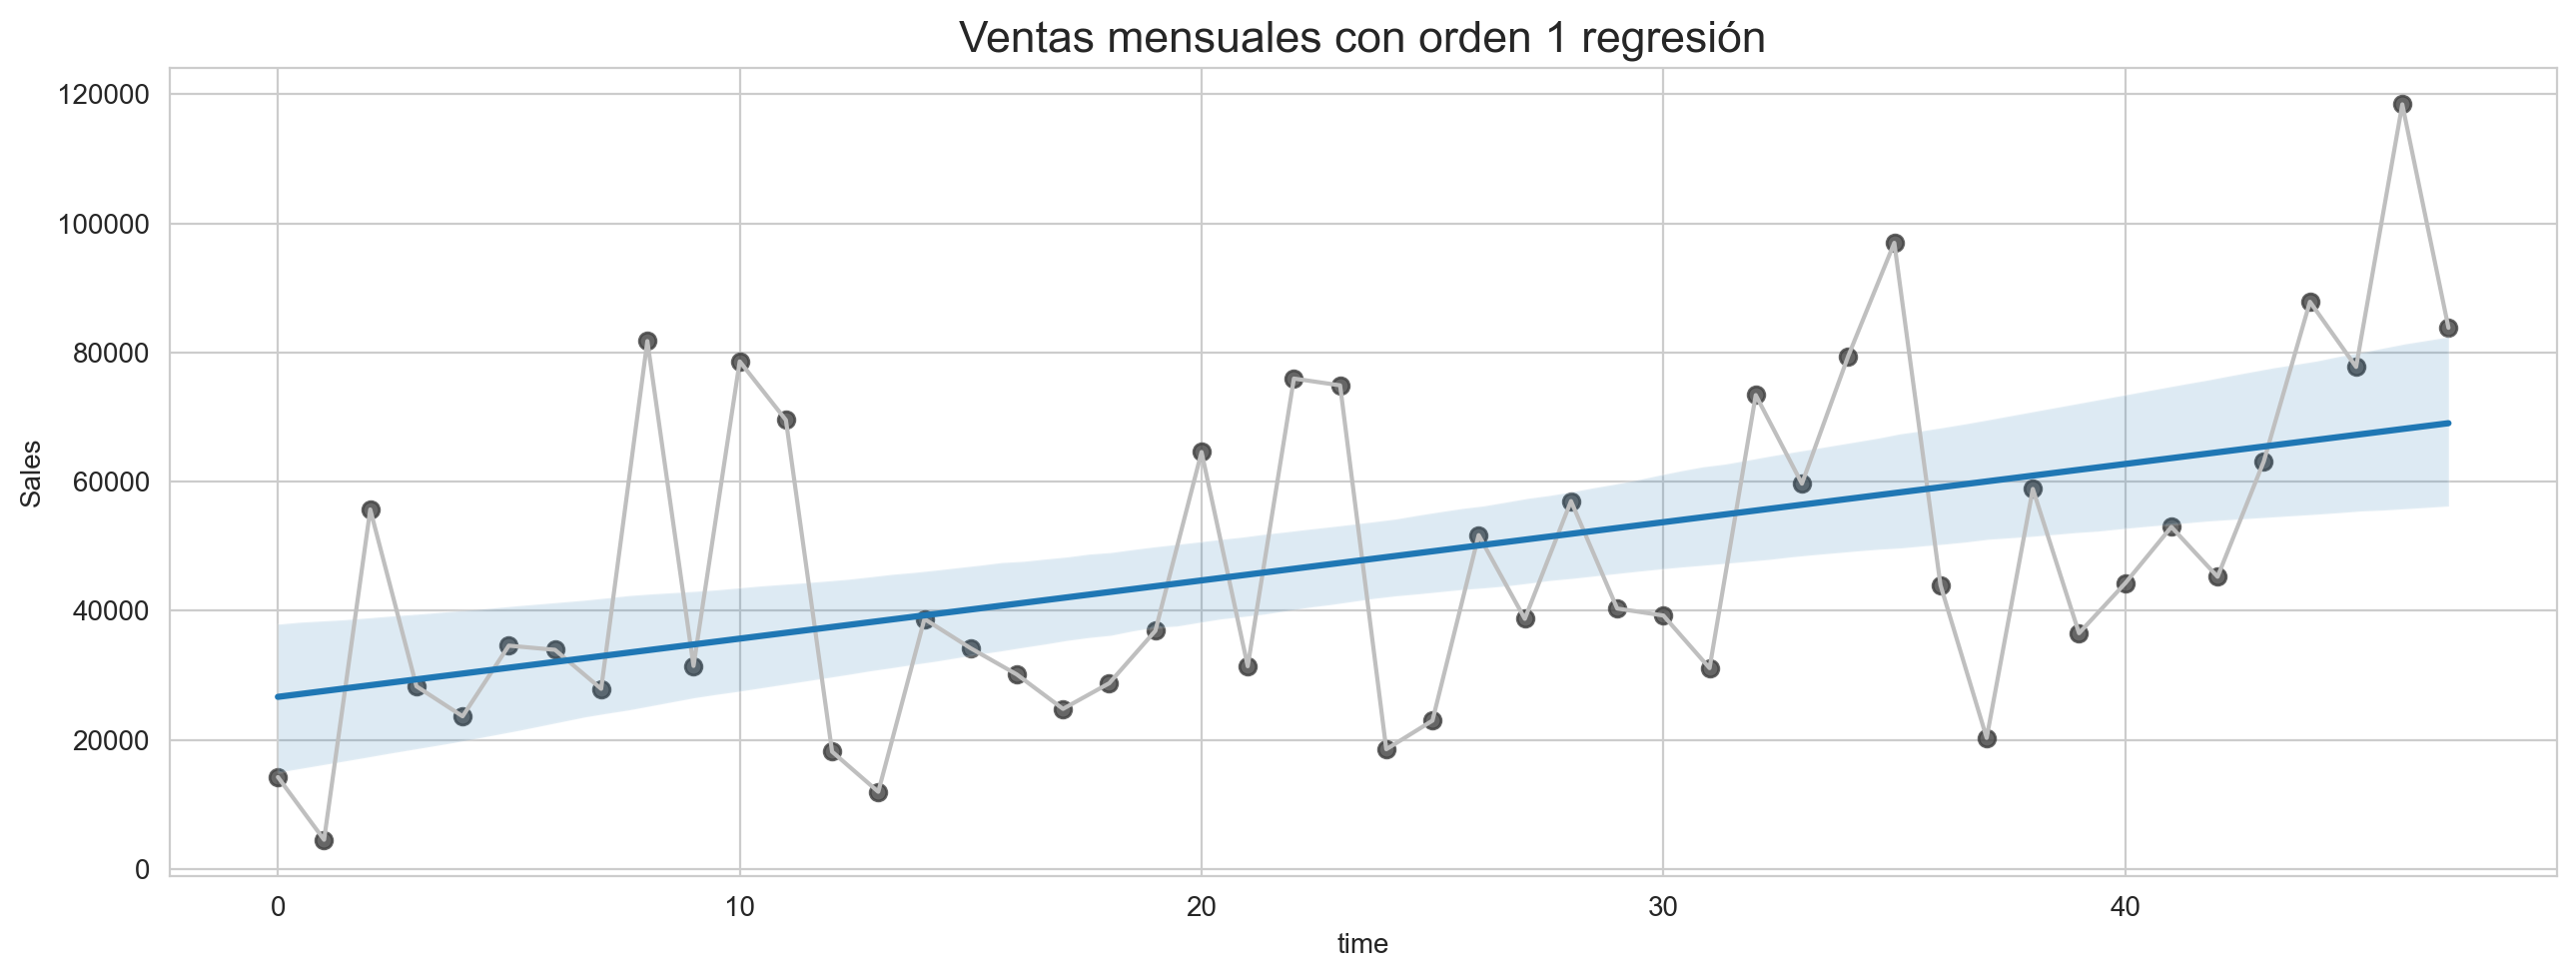

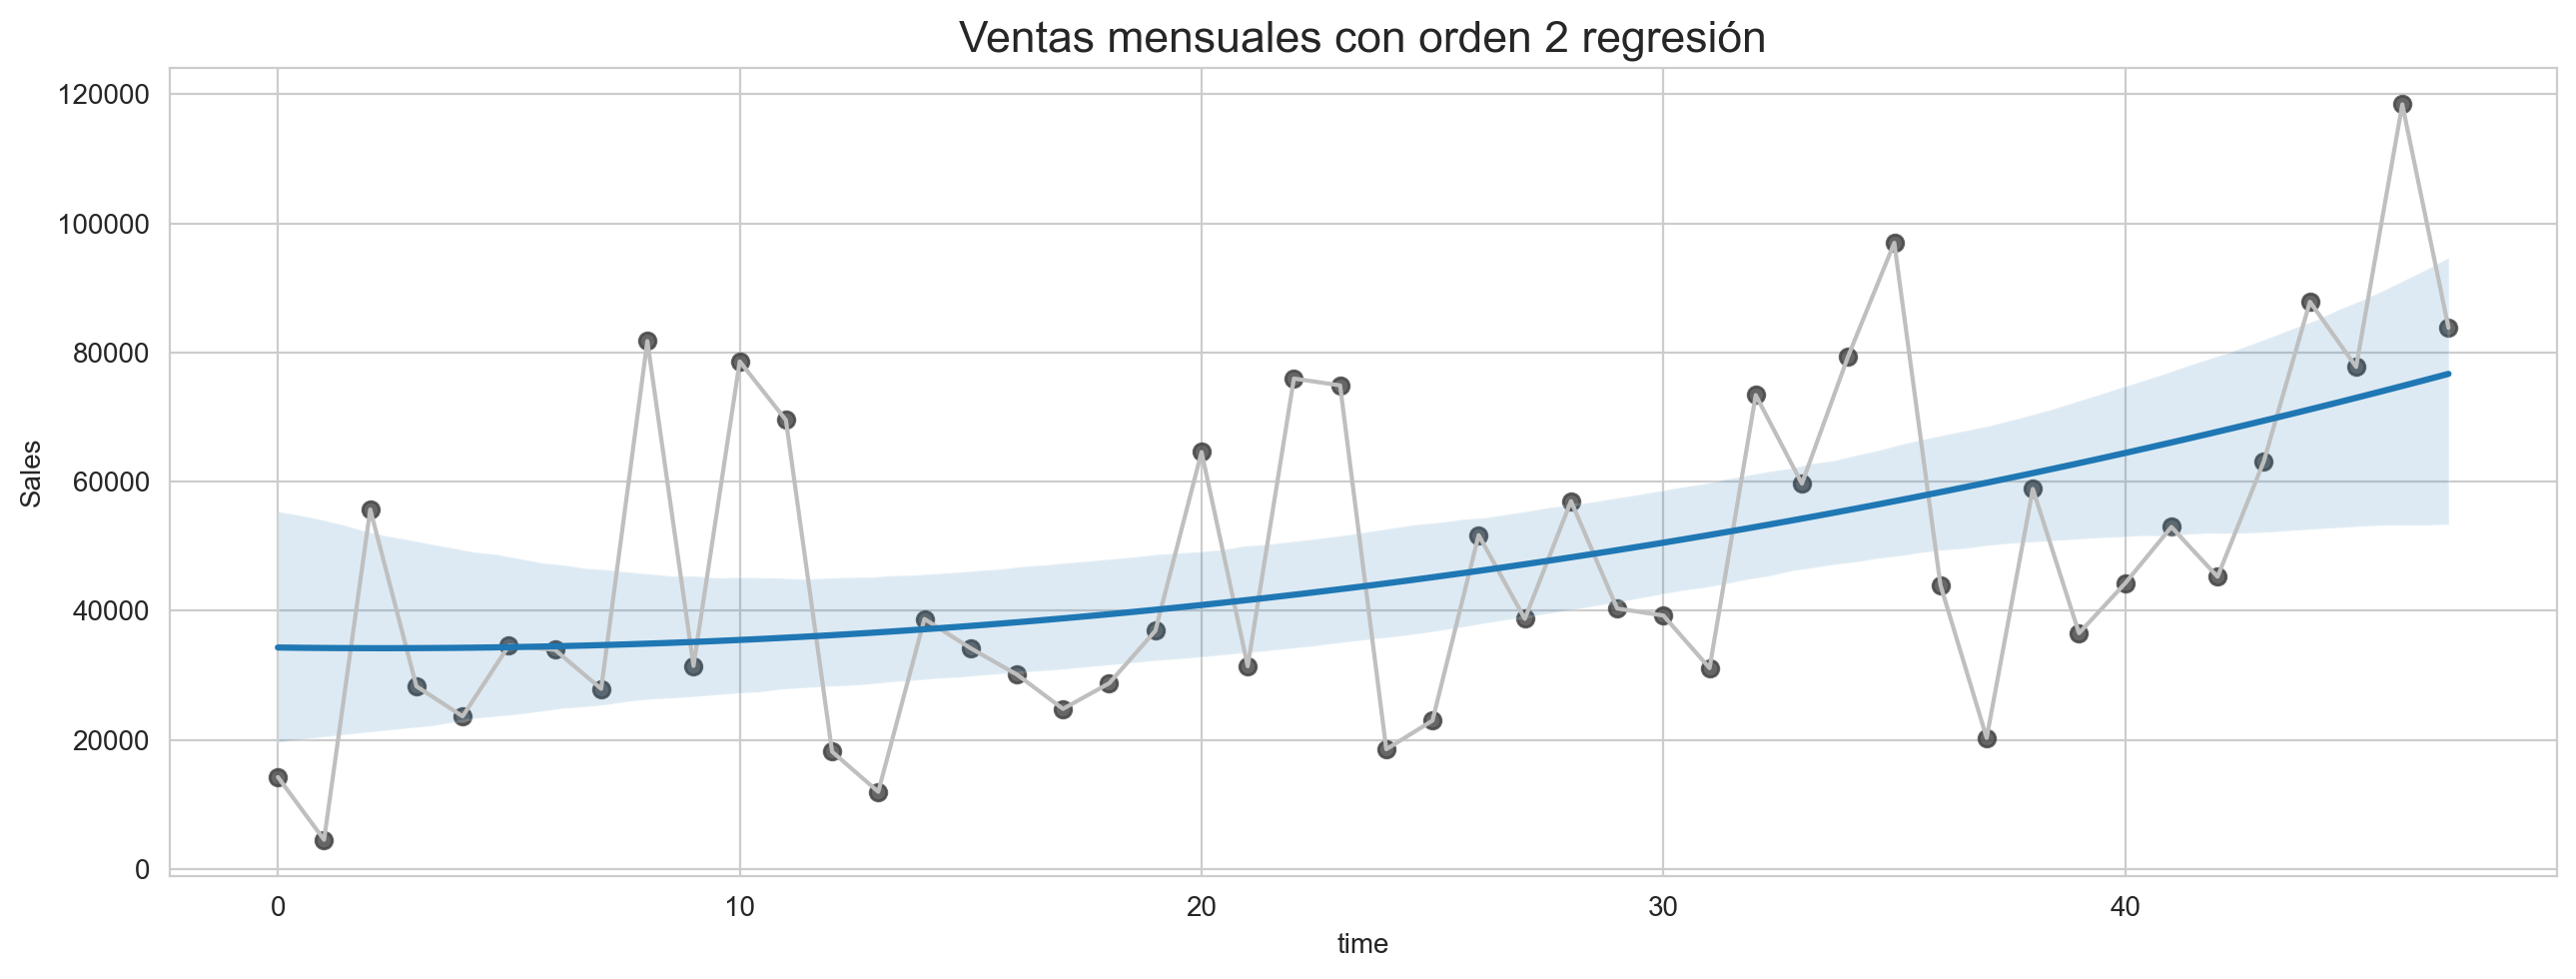

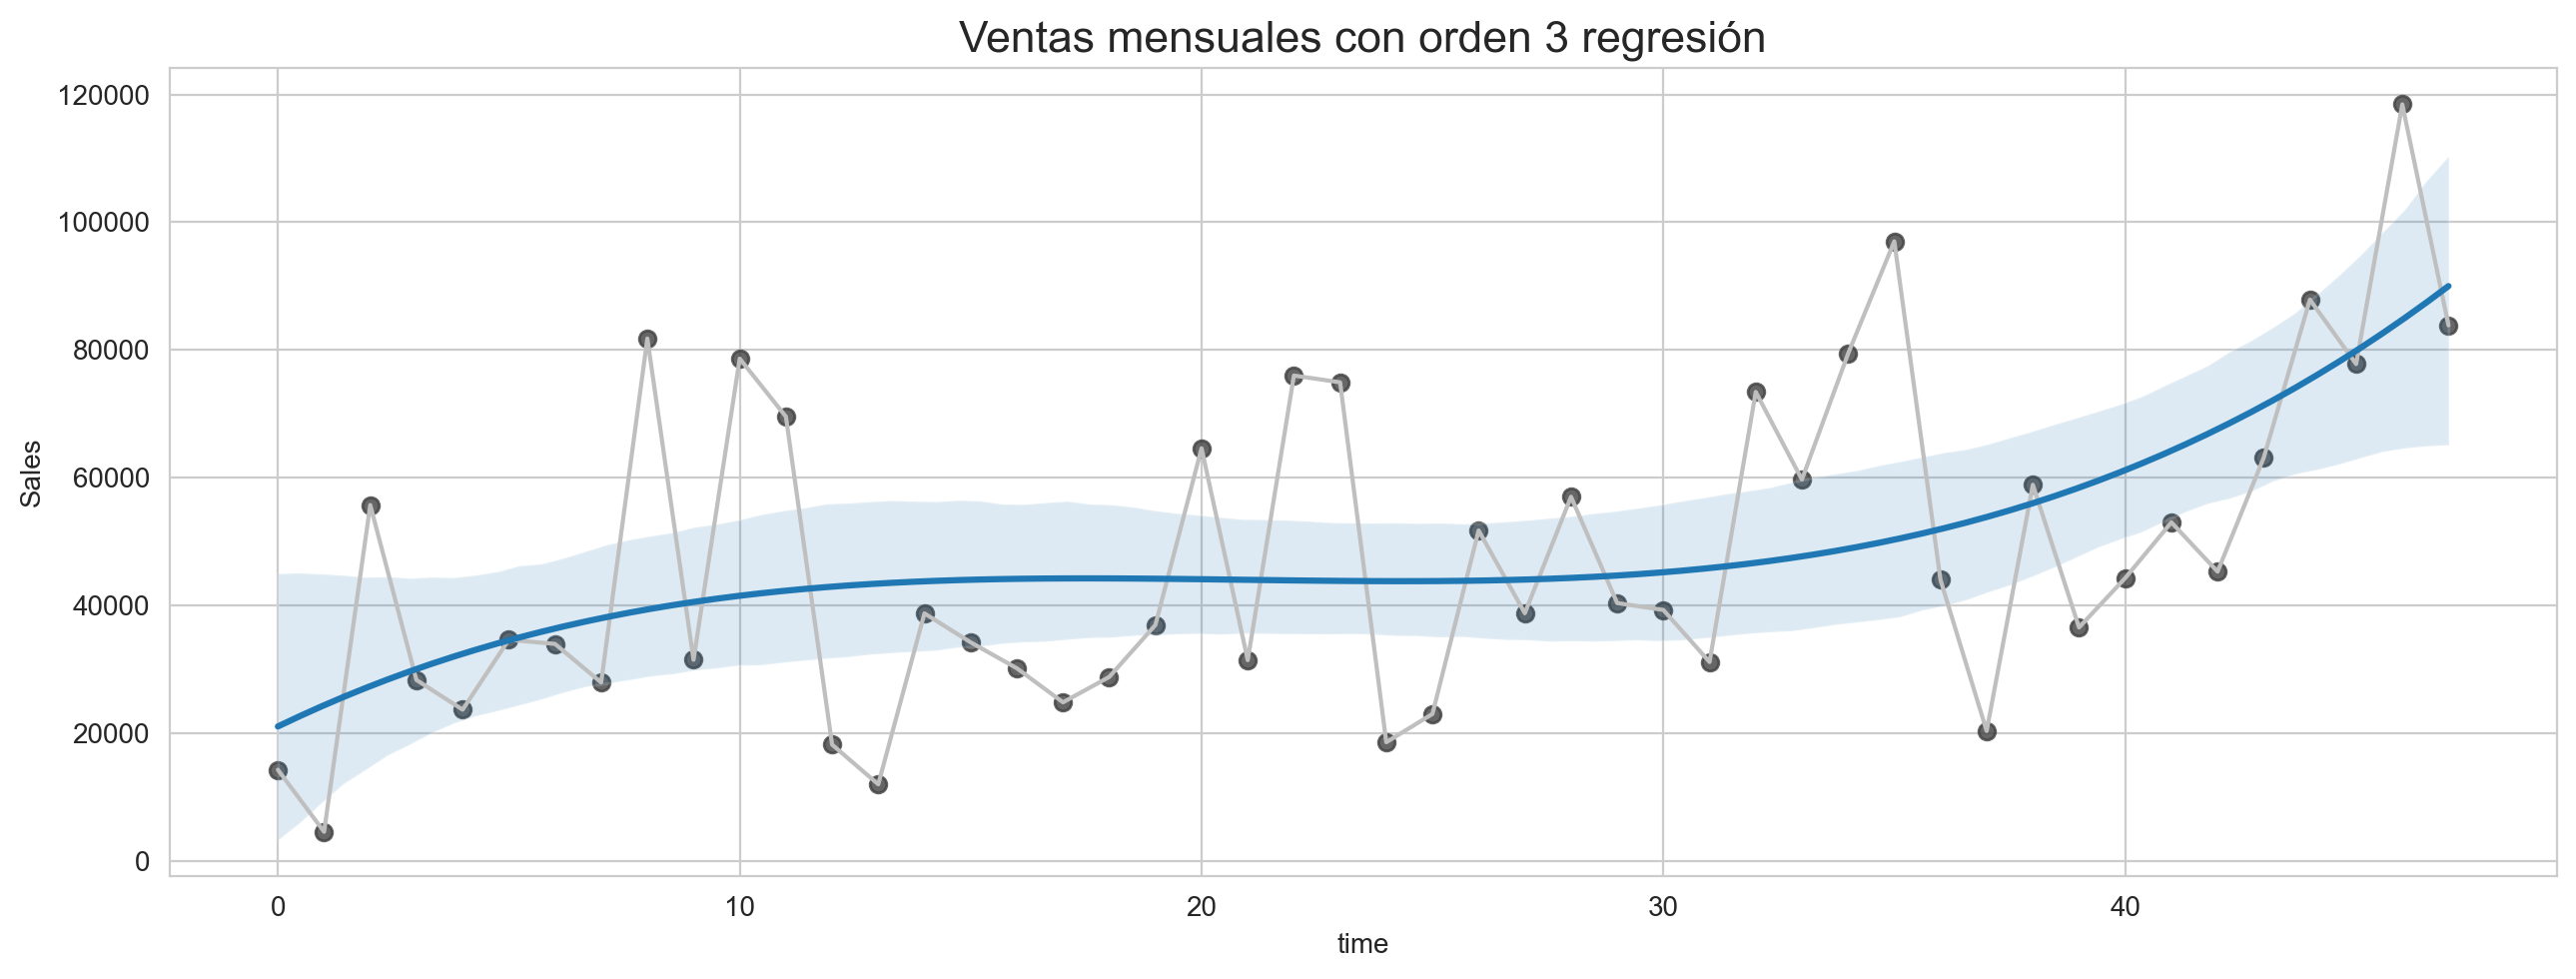

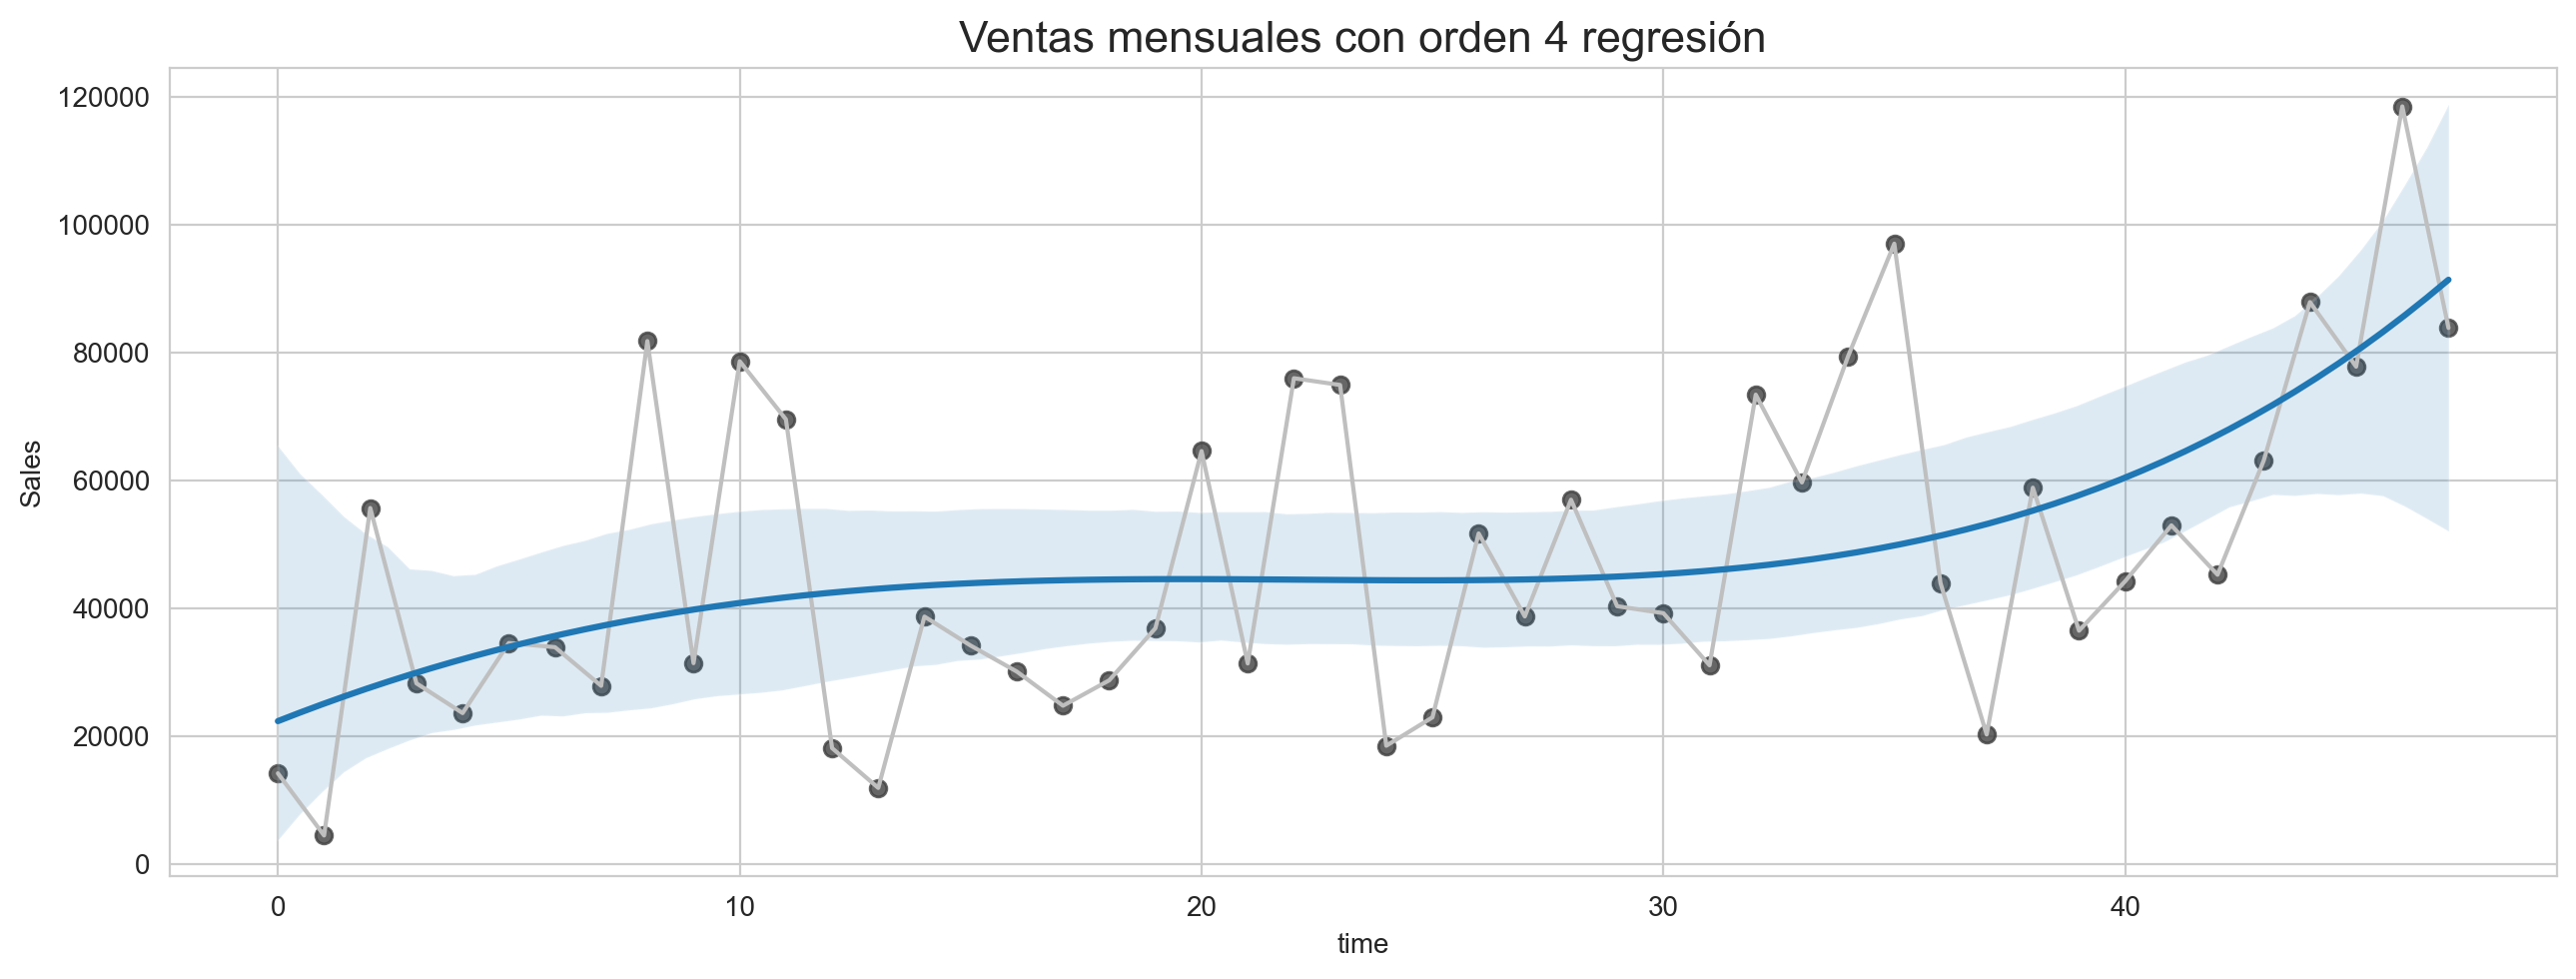

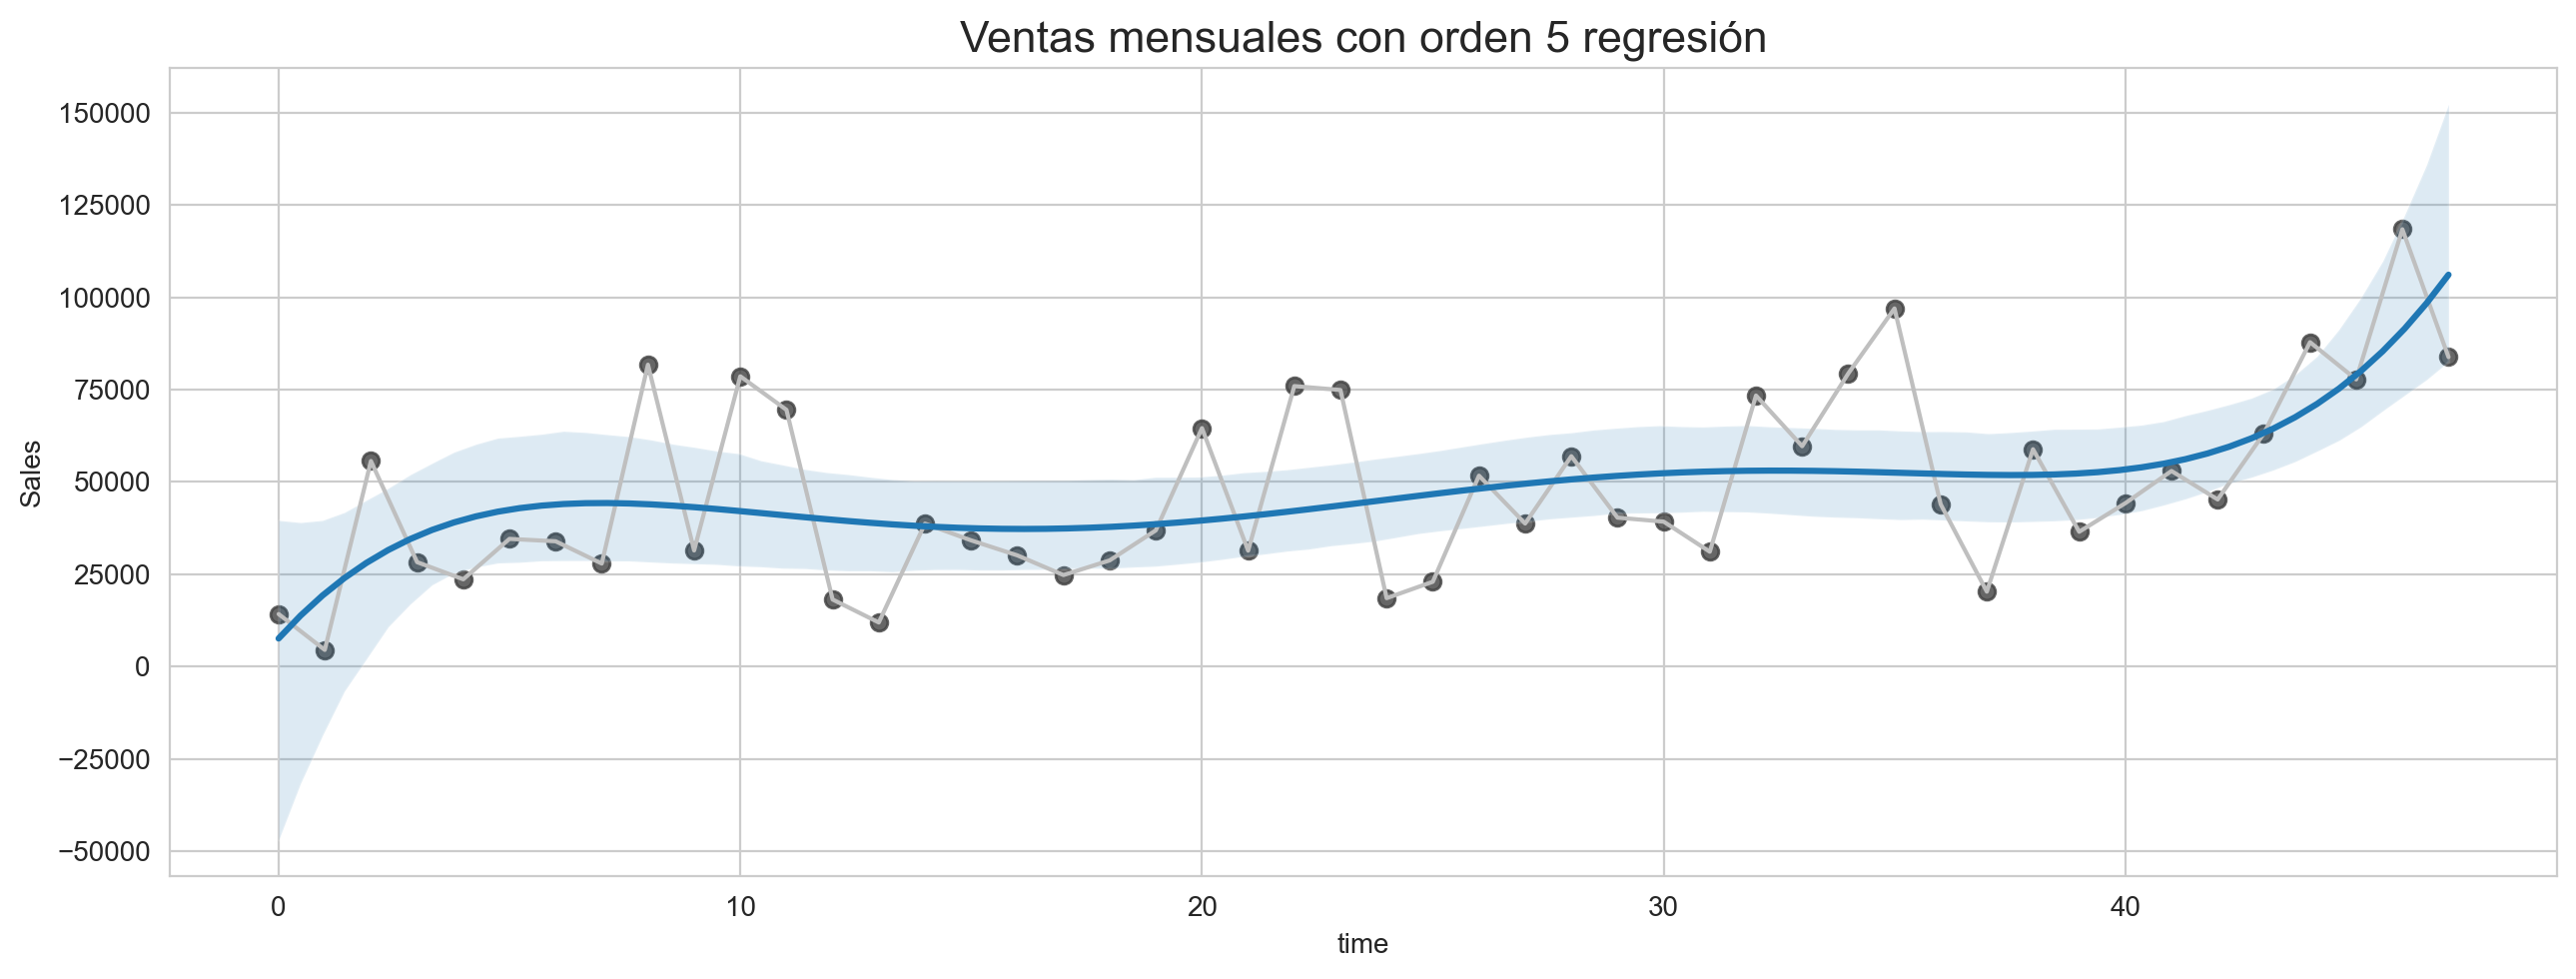

In [76]:
def plot_trend(order=1):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout = True, figsize= (13,5), titlesize = 18)
    plt.rc("axes", titlesize=16)
    %config InlineBackend.figure_format = 'retina'
    fig, ax = plt.subplots()
    ax.plot(ventas_por_mes['time'], ventas_por_mes['Sales'], color='0.75')
    ax = sns.regplot(data=ventas_por_mes, x='time', y='Sales', scatter_kws=dict(color='0.25'), order=order)
    ax.set_title('Ventas mensuales con orden {} regresión'.format(order));
for order in range(1,6):
    plot_trend(order)

In [97]:
x_p = ventas_por_mes['time'].to_numpy().reshape(48,1)
y_p = ventas_por_mes['Sales'].to_numpy().reshape(48,1)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size=0.2)

In [99]:
poli_reg = PolynomialFeatures(degree = 3)

In [100]:
x_train_poli = poli_reg.fit_transform(x_train_p)
x_test_poli = poli_reg.fit_transform(x_test_p)

In [101]:
from sklearn import linear_model
pr = linear_model.LinearRegression()

In [102]:
pr.fit(x_train_poli, y_train_p)

LinearRegression()

In [103]:
Y_pred_pr = pr.predict(x_test_poli)

In [104]:
Y_pred_pr.astype('int').shape[0]

10

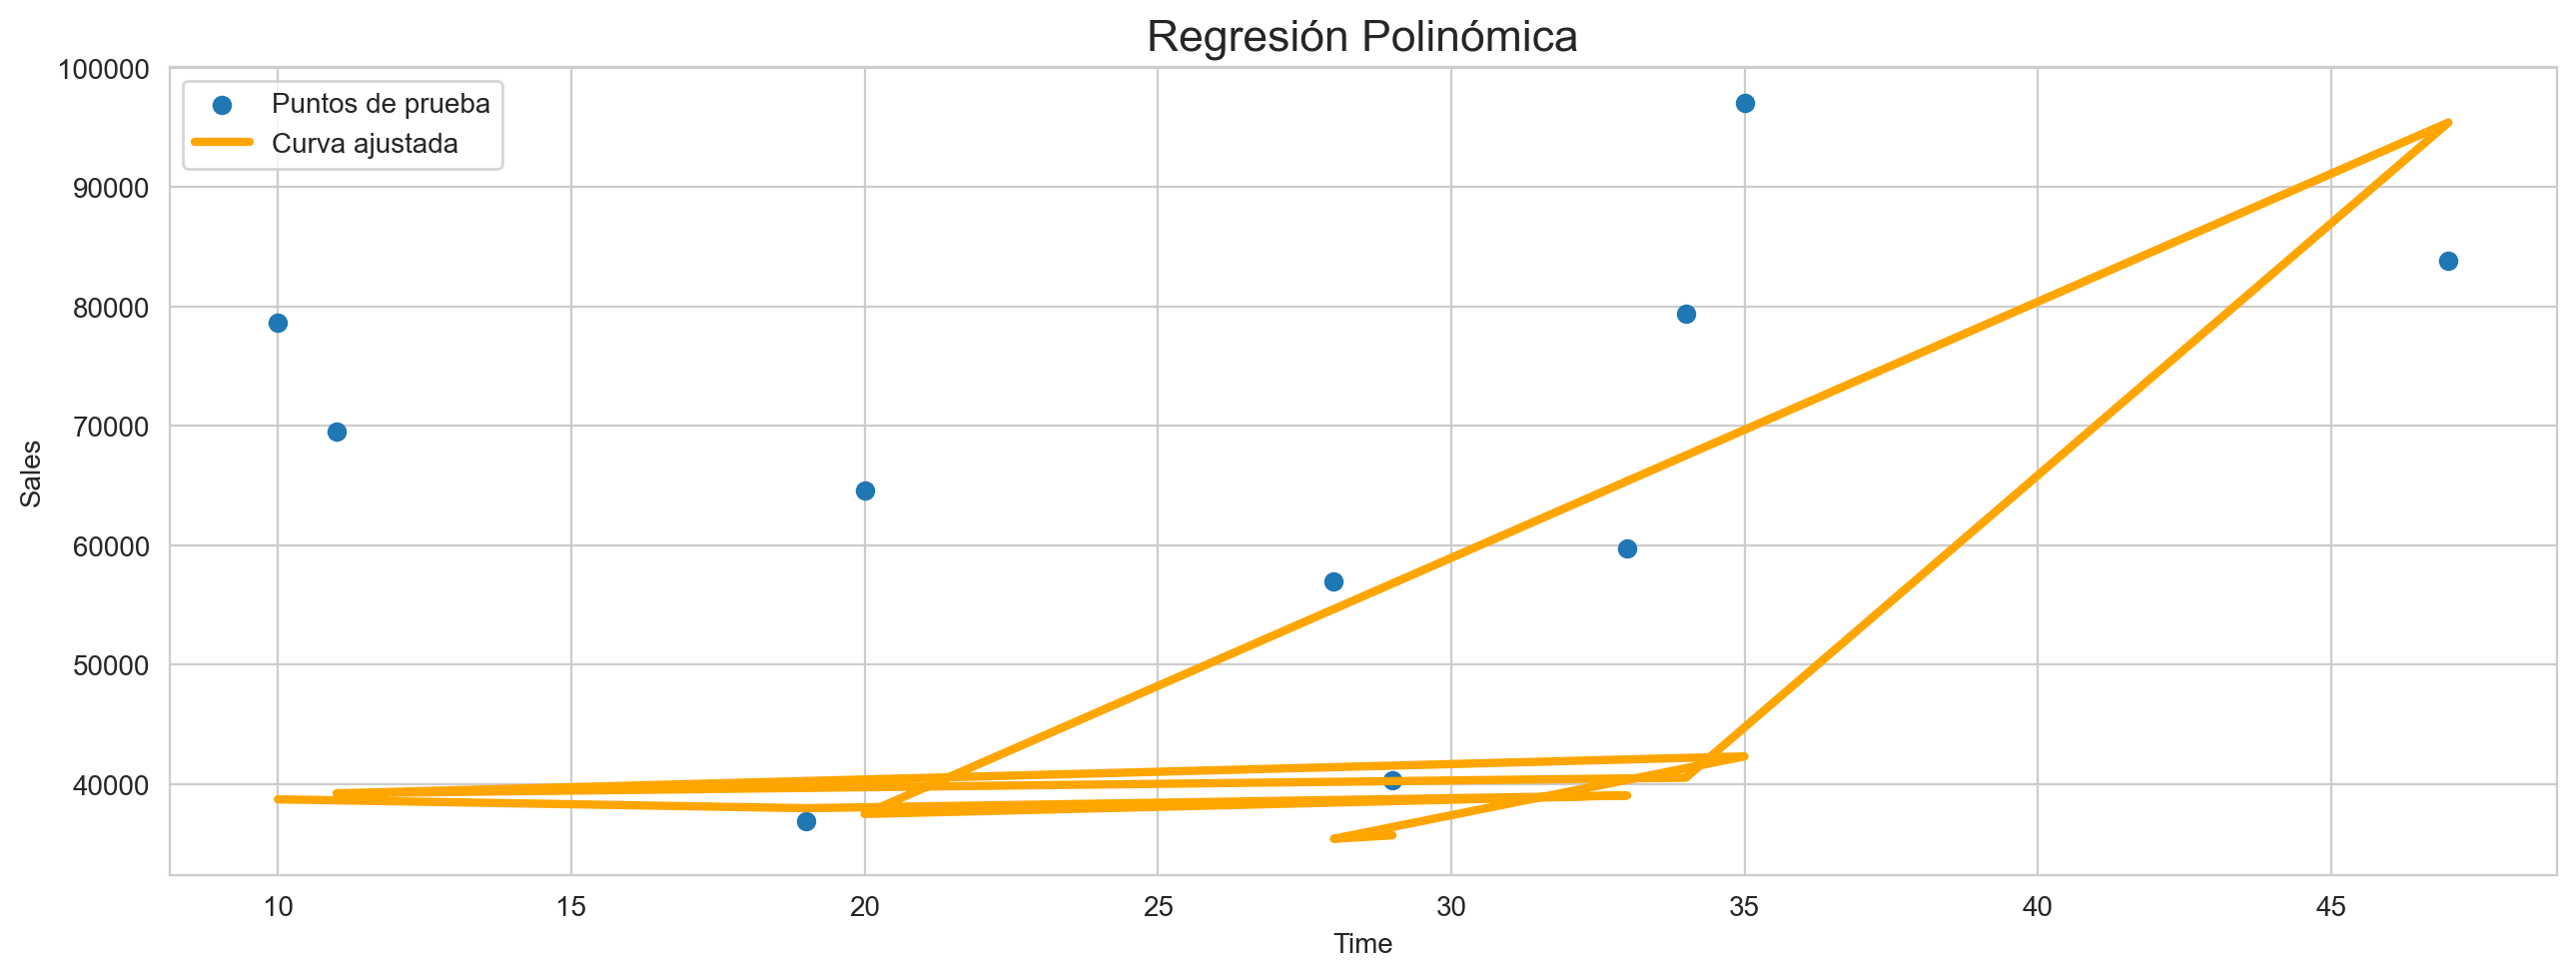

In [105]:
plt.scatter(x_test_p, y_test_p, label='Puntos de prueba')
plt.plot(x_test_p, Y_pred_pr, color='orange', linewidth=3, label='Curva ajustada')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

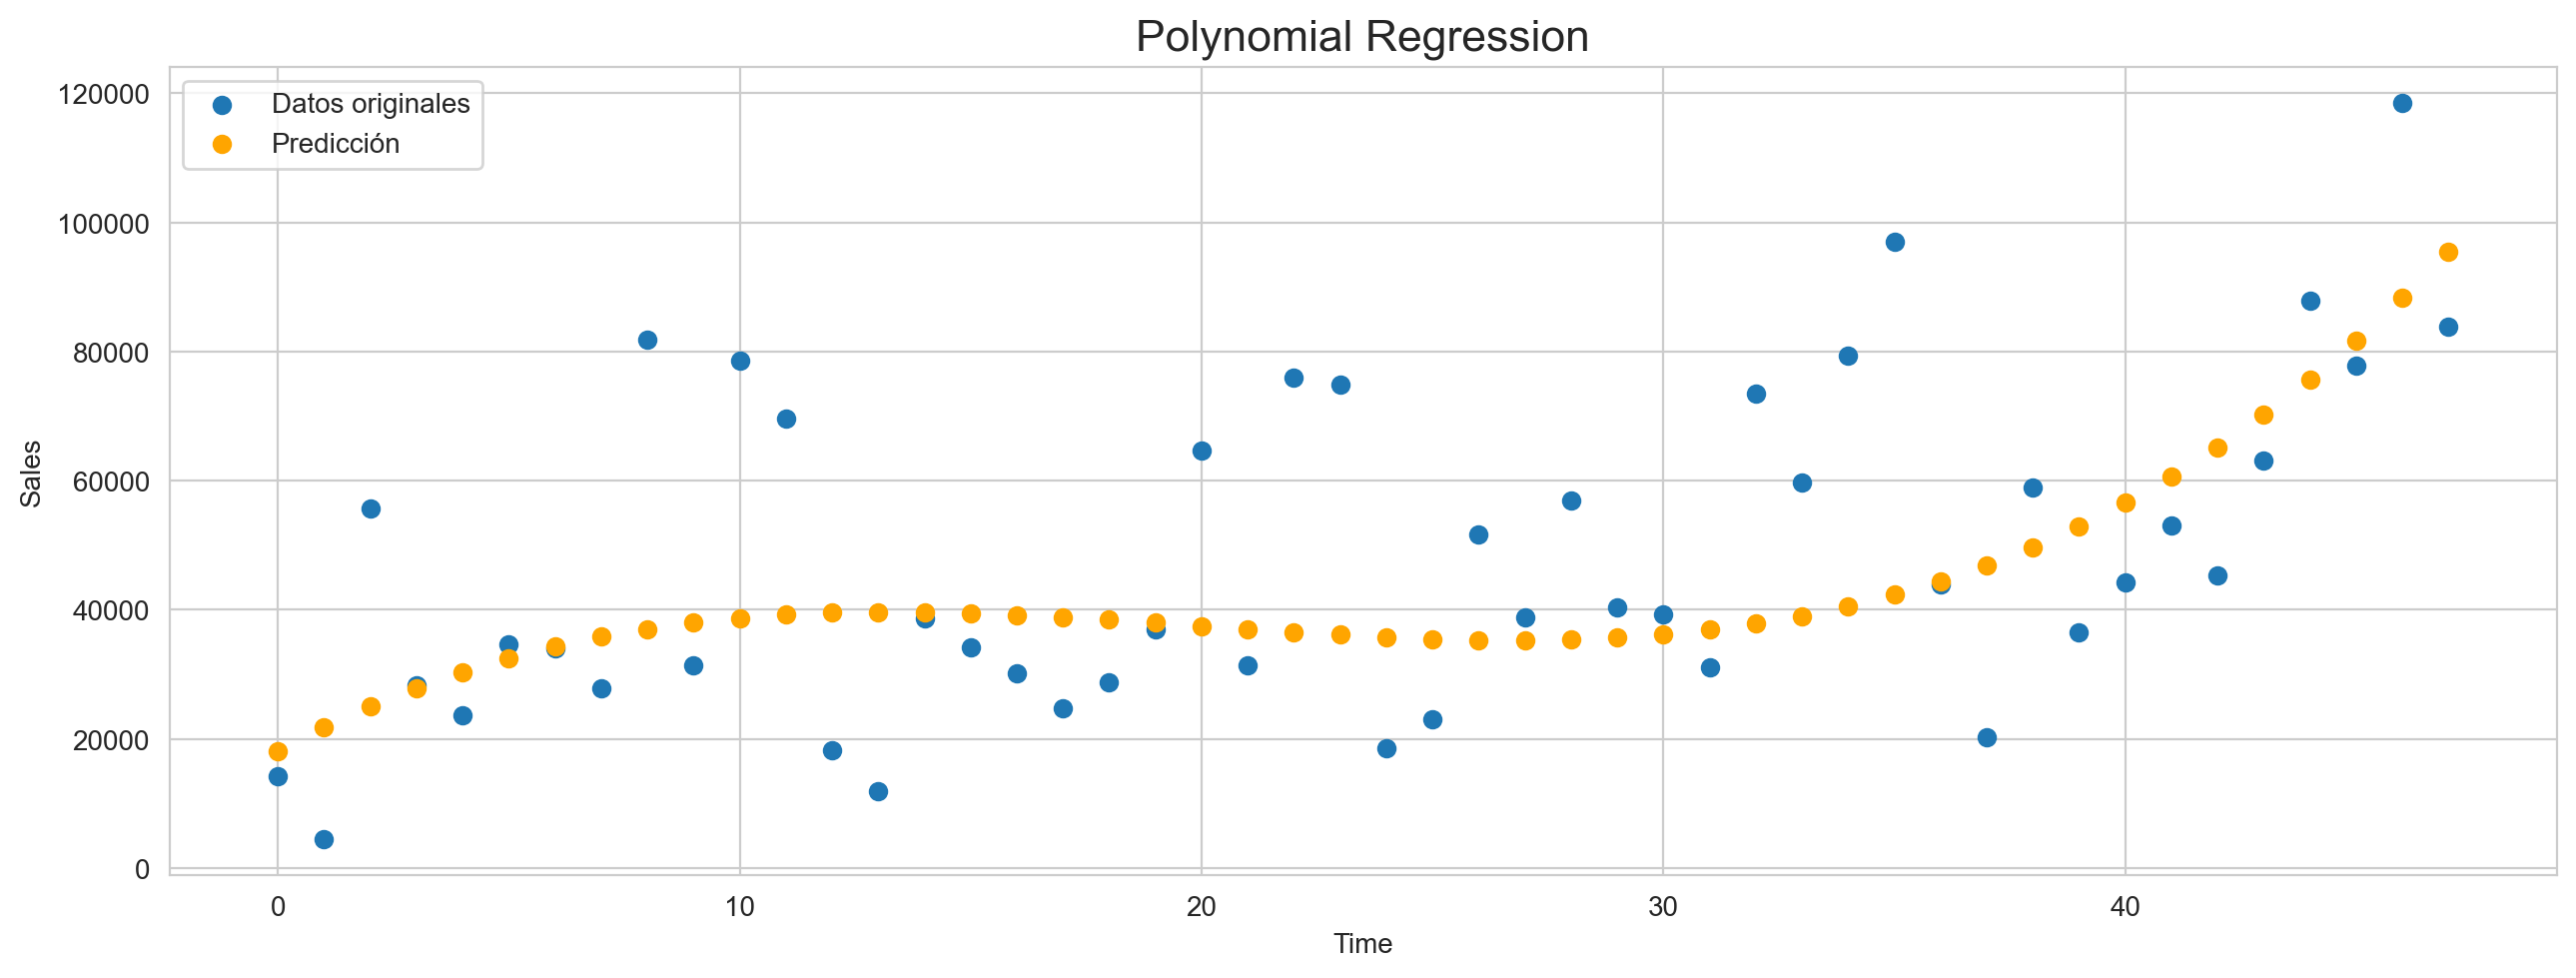

In [106]:
x_pred = np.arange(0, 48).reshape(-1, 1)

x_pred_poli = poli_reg.transform(x_pred)

y_pred = pr.predict(x_pred_poli)

plt.scatter(ventas_por_mes['time'], ventas_por_mes['Sales'], label='Datos originales')
plt.scatter(x_pred, y_pred, color='orange', label='Predicción')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [107]:
x_pred = np.arange(48, 60).reshape(-1,1)
x_pred_poli = poli_reg.transform(x_pred)
y_pred = pr.predict(x_pred_poli)
y_pred_dia = pr.predict(x_pred_poli)/30

Predicciones por mes

In [108]:
y_pred.astype('int')

array([[103119],
       [111446],
       [120403],
       [130013],
       [140296],
       [151274],
       [162970],
       [175405],
       [188601],
       [202579],
       [217361],
       [232969]])

Predicciones por día

In [109]:
y_pred_dia.astype('int')

array([[3437],
       [3714],
       [4013],
       [4333],
       [4676],
       [5042],
       [5432],
       [5846],
       [6286],
       [6752],
       [7245],
       [7765]])

In [110]:
print('Precicion del modelo:')
print(pr.score(x_train_poli, y_train_p))

Precicion del modelo:
0.4136038266736003


In [111]:
from sklearn.linear_model import LinearRegression

def fit_polynomial_regression(order=1):
    polynomial_features = PolynomialFeatures(degree=order)
    x_train_p_poly = polynomial_features.fit_transform(x_train_p)
    x_test_p_poly = polynomial_features.transform(x_test_p)
    
    model = LinearRegression()
    model.fit(x_train_p_poly, y_train_p)
    
    train_score = model.score(x_train_p_poly, y_train_p)
    test_score = model.score(x_test_p_poly, y_test_p)
    
    print(f"Regresión Polinómica (Orden {order}):")
    print(f"  - Puntaje R^2: {train_score:.2f}")
    print(f"  - Puntaje R^2 en Prueba: {test_score:.2f}")
    print("")
for order in range(1, 6):
    fit_polynomial_regression(order)

Regresión Polinómica (Orden 1):
  - Puntaje R^2: 0.28
  - Puntaje R^2 en Prueba: -1.25

Regresión Polinómica (Orden 2):
  - Puntaje R^2: 0.33
  - Puntaje R^2 en Prueba: -1.47

Regresión Polinómica (Orden 3):
  - Puntaje R^2: 0.41
  - Puntaje R^2 en Prueba: -1.70

Regresión Polinómica (Orden 4):
  - Puntaje R^2: 0.45
  - Puntaje R^2 en Prueba: -2.23

Regresión Polinómica (Orden 5):
  - Puntaje R^2: 0.54
  - Puntaje R^2 en Prueba: -2.70



In [112]:
r2_2 = r2_score(y_test_p, Y_pred_pr)
mae_2 = mean_absolute_error(y_test_p, Y_pred_pr)
mse_2 = mean_squared_error(y_test_p, Y_pred_pr)
rmse_2 = np.sqrt(mse_2)
medae_2 = median_absolute_error(y_test_p, Y_pred_pr)
me_2 = max_error(y_test_p, Y_pred_pr)
evs_2 = explained_variance_score(y_test_p, Y_pred_pr)
mape_2 = mean_absolute_percentage_error(y_test_p, Y_pred_pr)

# Imprime las métricas
print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2_2))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae_2))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse_2))
print("Raíz del Error Cuadrático Medio (RMSE): {:.2f}".format(rmse_2))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae_2))
print("Error Máximo (ME): {:.2f}".format(me_2))
print("Varianza Explicada (EVS): {:.2f}".format(evs_2))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape_2))

R2 Score (Coeficiente de determinación): -1.70
Error Absoluto Medio (MAE): 25042.93
Error Cuadrático Medio (MSE): 879859779.07
Raíz del Error Cuadrático Medio (RMSE): 29662.43
Error Absoluto Mediano (MEDAE): 24341.08
Error Máximo (ME): 54685.06
Varianza Explicada (EVS): -0.15
Error Porcentual Absoluto Medio (MAPE): 0.34


Los resultados indican que el modelo de predicción no es bueno y que hay una falta significativa de precisión en las predicciones.

### Regresion lineal: segunda manera


El método de Fourier se basa en la serie de Fourier, que es una forma de representar una función periódica como una suma ponderada de funciones sinusoidales (senos y cosenos) de diferentes frecuencias. La formula:
$$f(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi n x}{l}\right) + b_n \sin\left(\frac{2\pi n x}{l}\right) \right)$$

El método de Fourier se utiliza en el análisis de series temporales para modelar la estacionalidad, que es una forma de patrón periódico que se repite a intervalos regulares. Al aplicar el método de Fourier a los datos de ventas mensuales, estamos buscando descomponer la serie temporal en componentes sinusoidales que representen la estacionalidad mensual. Esto nos permite capturar la estructura cíclica de los datos y modelar adecuadamente la variación estacional en las ventas a lo largo del año.

In [138]:
from statsmodels.tsa.deterministic  import DeterministicProcess, CalendarFourier

fourier = CalendarFourier(freq = 'ME', order = 3)
dp = DeterministicProcess(
    index=ventas_por_mes.index,
    constant=True,
    order=2,
    additional_terms = [fourier],
    seasonal =True,
    drop=True,         
)
X = dp.in_sample()

Al usar el último año para el conjunto de prueba (x_test e y_test), se otorga mayor peso a la tendencia más reciente de los datos. Esta elección permite capturar de manera más precisa la evolución actual de la serie temporal, brindando así una evaluación más precisa del rendimiento del modelo en condiciones más cercanas al presente.

In [143]:
y = ventas_por_mes['Sales']
X_train= X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred1 = pd.Series(model.predict(X_train), index = X_train.index)
y_pred2 = pd.Series(model.predict(X_test), index = X_test.index)
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)

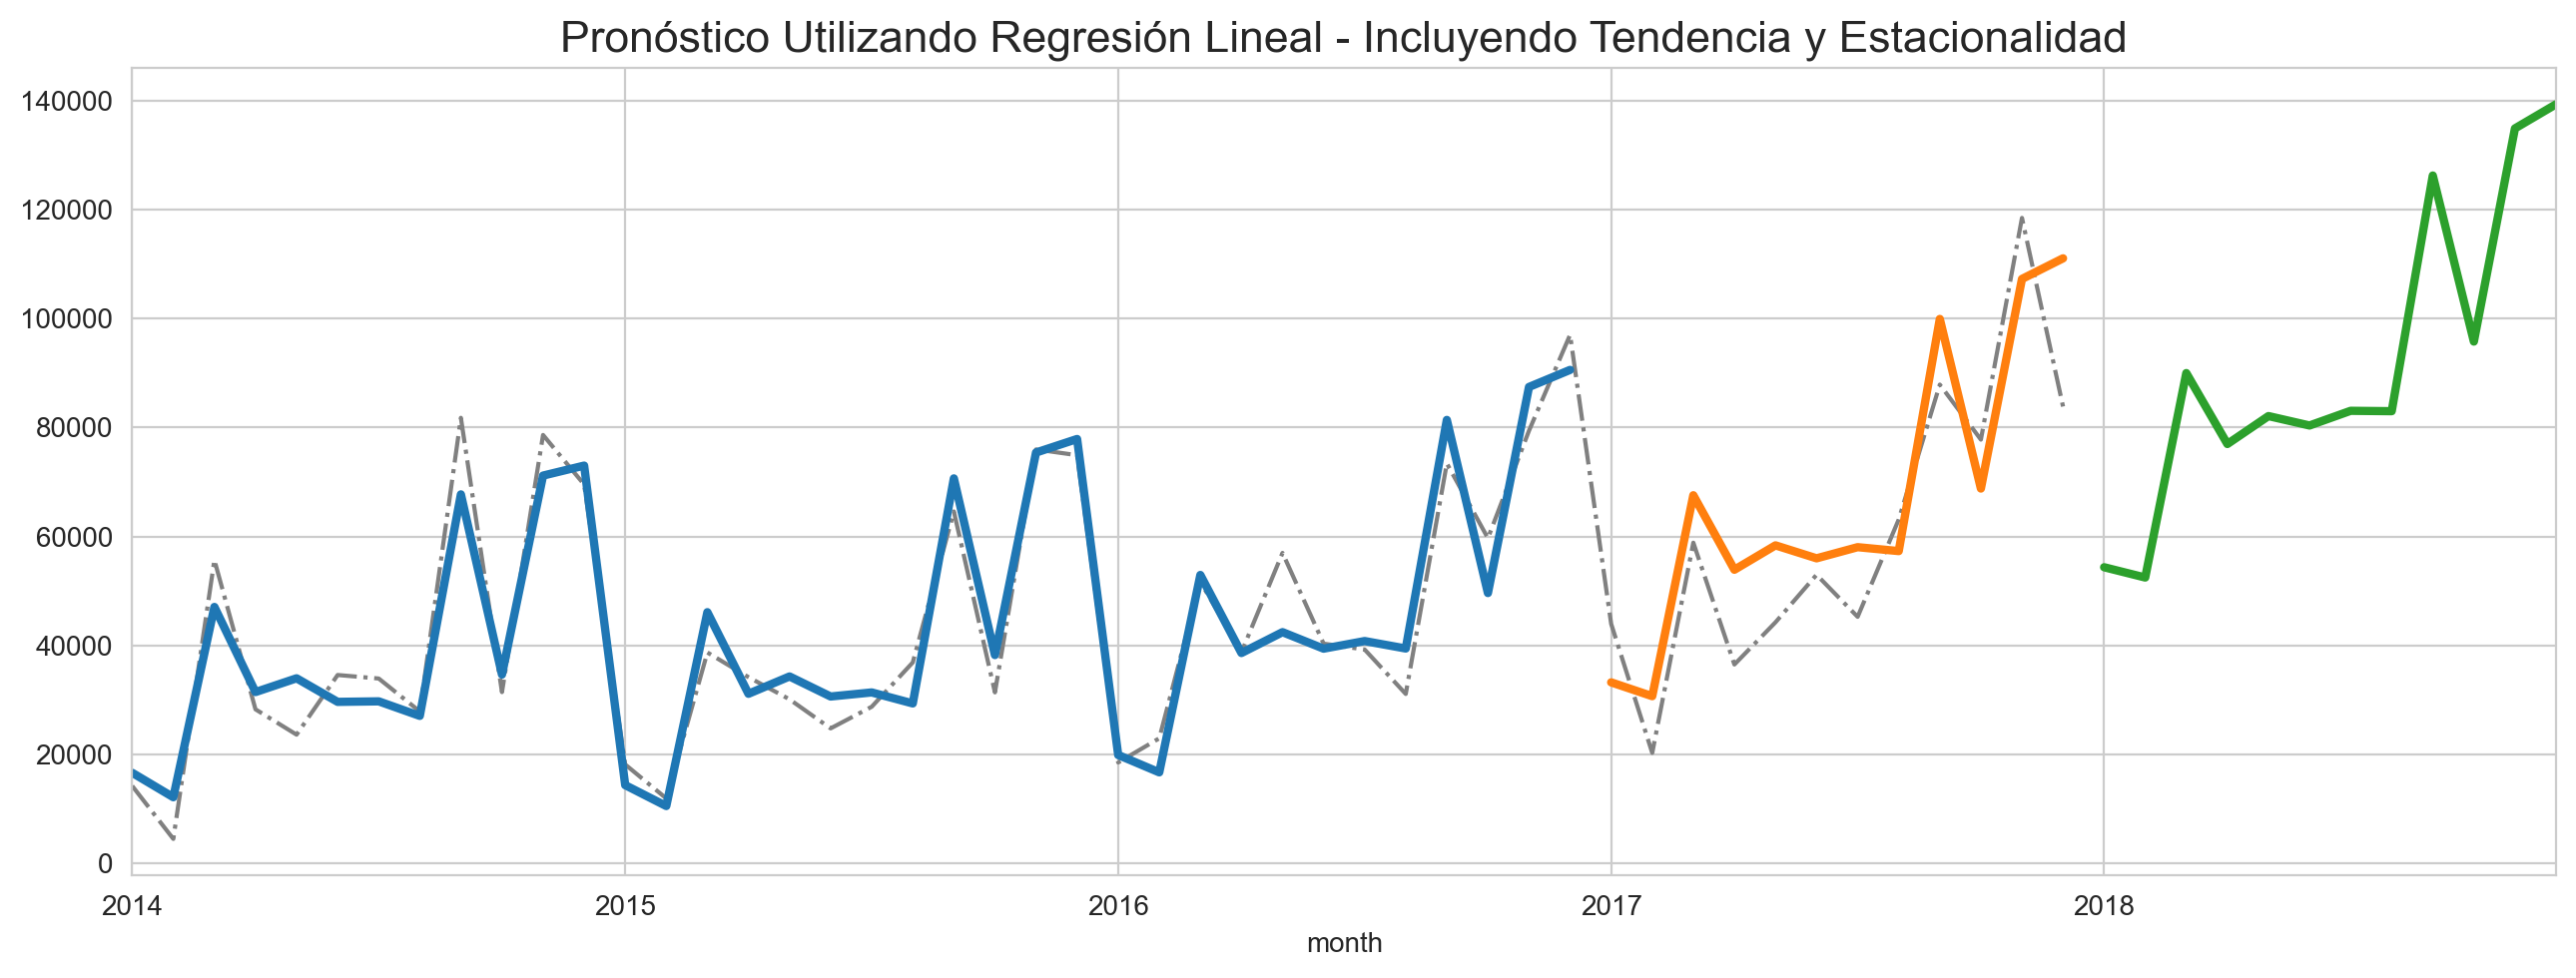

In [140]:
ax = ventas_por_mes['Sales'].plot(style="-.", color="0.5", title="Pronóstico Utilizando Regresión Lineal - Incluyendo Tendencia y Estacionalidad")
ax = y_pred1.plot(ax=ax, linewidth=3, label="tendencia")
ax = y_pred2.plot(ax =ax, linewidth=3)
ax = y_forecast.plot(ax=ax, linewidth=3, label="Pronóstico tendencia")

In [142]:
(y_forecast).astype('int')

2018-01-01     54362
2018-02-01     52476
2018-03-01     89985
2018-04-01     76970
2018-05-01     82094
2018-06-01     80365
2018-07-01     83059
2018-08-01     82991
2018-09-01    126226
2018-10-01     95762
2018-11-01    134867
2018-12-01    139299
Freq: MS, dtype: int32

In [141]:
r2_3 = r2_score(y_test, y_pred2)
mae_3 = mean_absolute_error(y_test, y_pred2)
mse_3 = mean_squared_error(y_test, y_pred2)
msle_3 = mean_squared_log_error(y_test,y_pred2)
mape_3 = mean_absolute_percentage_error(y_test, y_pred2)
medae_3 = median_absolute_error(y_test, y_pred2)
me_3 = max_error(y_test, y_pred2)
evs_3 = explained_variance_score(y_test, y_pred2)
mpl_3 = mean_pinball_loss(y_test, y_pred2)
d2t_3 = d2_tweedie_score(y_test, y_pred2)
d2p_3 = d2_pinball_score(y_test, y_pred2)

print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2_3))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae_3))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse_3))
print("Error cuadrático medio del logaritmo (MSLE): {:.2f}".format(msle_3))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape_3))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae_3))
print("Error Máximo (ME): {:.2f}".format(me_3))
print("Varianza Explicada (EVS): {:.2f}".format(evs_3))
print("Pérdida Media de Pinball (MPL): {:.2f}".format(mpl_3))
print("Puntuación Tweedie D^2 (D2T): {:.2f}".format(d2t_3))
print("Puntuación de Pinball D^2 (D2P): {:.2f}".format(d2p_3))

R2 Score (Coeficiente de determinación): 0.74
Error Absoluto Medio (MAE): 11861.97
Error Cuadrático Medio (MSE): 174796716.00
Error cuadrático medio del logaritmo (MSLE): 0.06
Error Porcentual Absoluto Medio (MAPE): 0.23
Error Absoluto Mediano (MEDAE): 10961.59
Error Máximo (ME): 27206.23
Varianza Explicada (EVS): 0.79
Pérdida Media de Pinball (MPL): 5930.99
Puntuación Tweedie D^2 (D2T): 0.74
Puntuación de Pinball D^2 (D2P): 0.42


Los resultados indican que el modelo tiene un buen desempeño en la predicción de las ventas, con una capacidad para capturar la variabilidad en los datos y realizar predicciones precisas.

### Regresión lineal con Ada Boost: tercera manera

AdaBoostRegressor es un algoritmo de regresión que combina varios modelos de regresión simples, como modelos lineales, para formar un modelo más robusto. A lo largo de varias iteraciones, el algoritmo se enfoca en las instancias que son más difíciles de predecir, mejorando gradualmente la precisión del modelo final al combinar las predicciones de los modelos individuales.

In [144]:
X_train= X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 40 , estimator = LinearRegression(), loss='square', learning_rate = 0.5, random_state =21)
ada.fit(X_train,y_train)

y_pred3 = pd.Series(ada.predict(X_train), index = X_train.index)
y_pred4 = pd.Series(ada.predict(X_test), index = X_test.index)
y_forecast = pd.Series(ada.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)

r_squared_fit = r2_score(y_train,y_pred3)
r_squared_test = r2_score(y_test,y_pred4)

print(r_squared_fit)
print(r_squared_test)

0.944132798302055
0.7691982659169184


In [145]:
proximos_meses = pd.date_range(start='2018-01-01', periods=12, freq='ME')

X_proximos_meses = dp.out_of_sample(steps=12)

y_pred_proximos_meses = ada.predict(X_proximos_meses)

ventas_predichas_proximos_meses = pd.Series(y_pred_proximos_meses, index=proximos_meses)
print(ventas_predichas_proximos_meses.astype('int'))

2018-01-31     51152
2018-02-28     48562
2018-03-31     88409
2018-04-30     71958
2018-05-31     77124
2018-06-30     71040
2018-07-31     73405
2018-08-31     74204
2018-09-30    122416
2018-10-31     93483
2018-11-30    125529
2018-12-31    127017
Freq: ME, dtype: int32


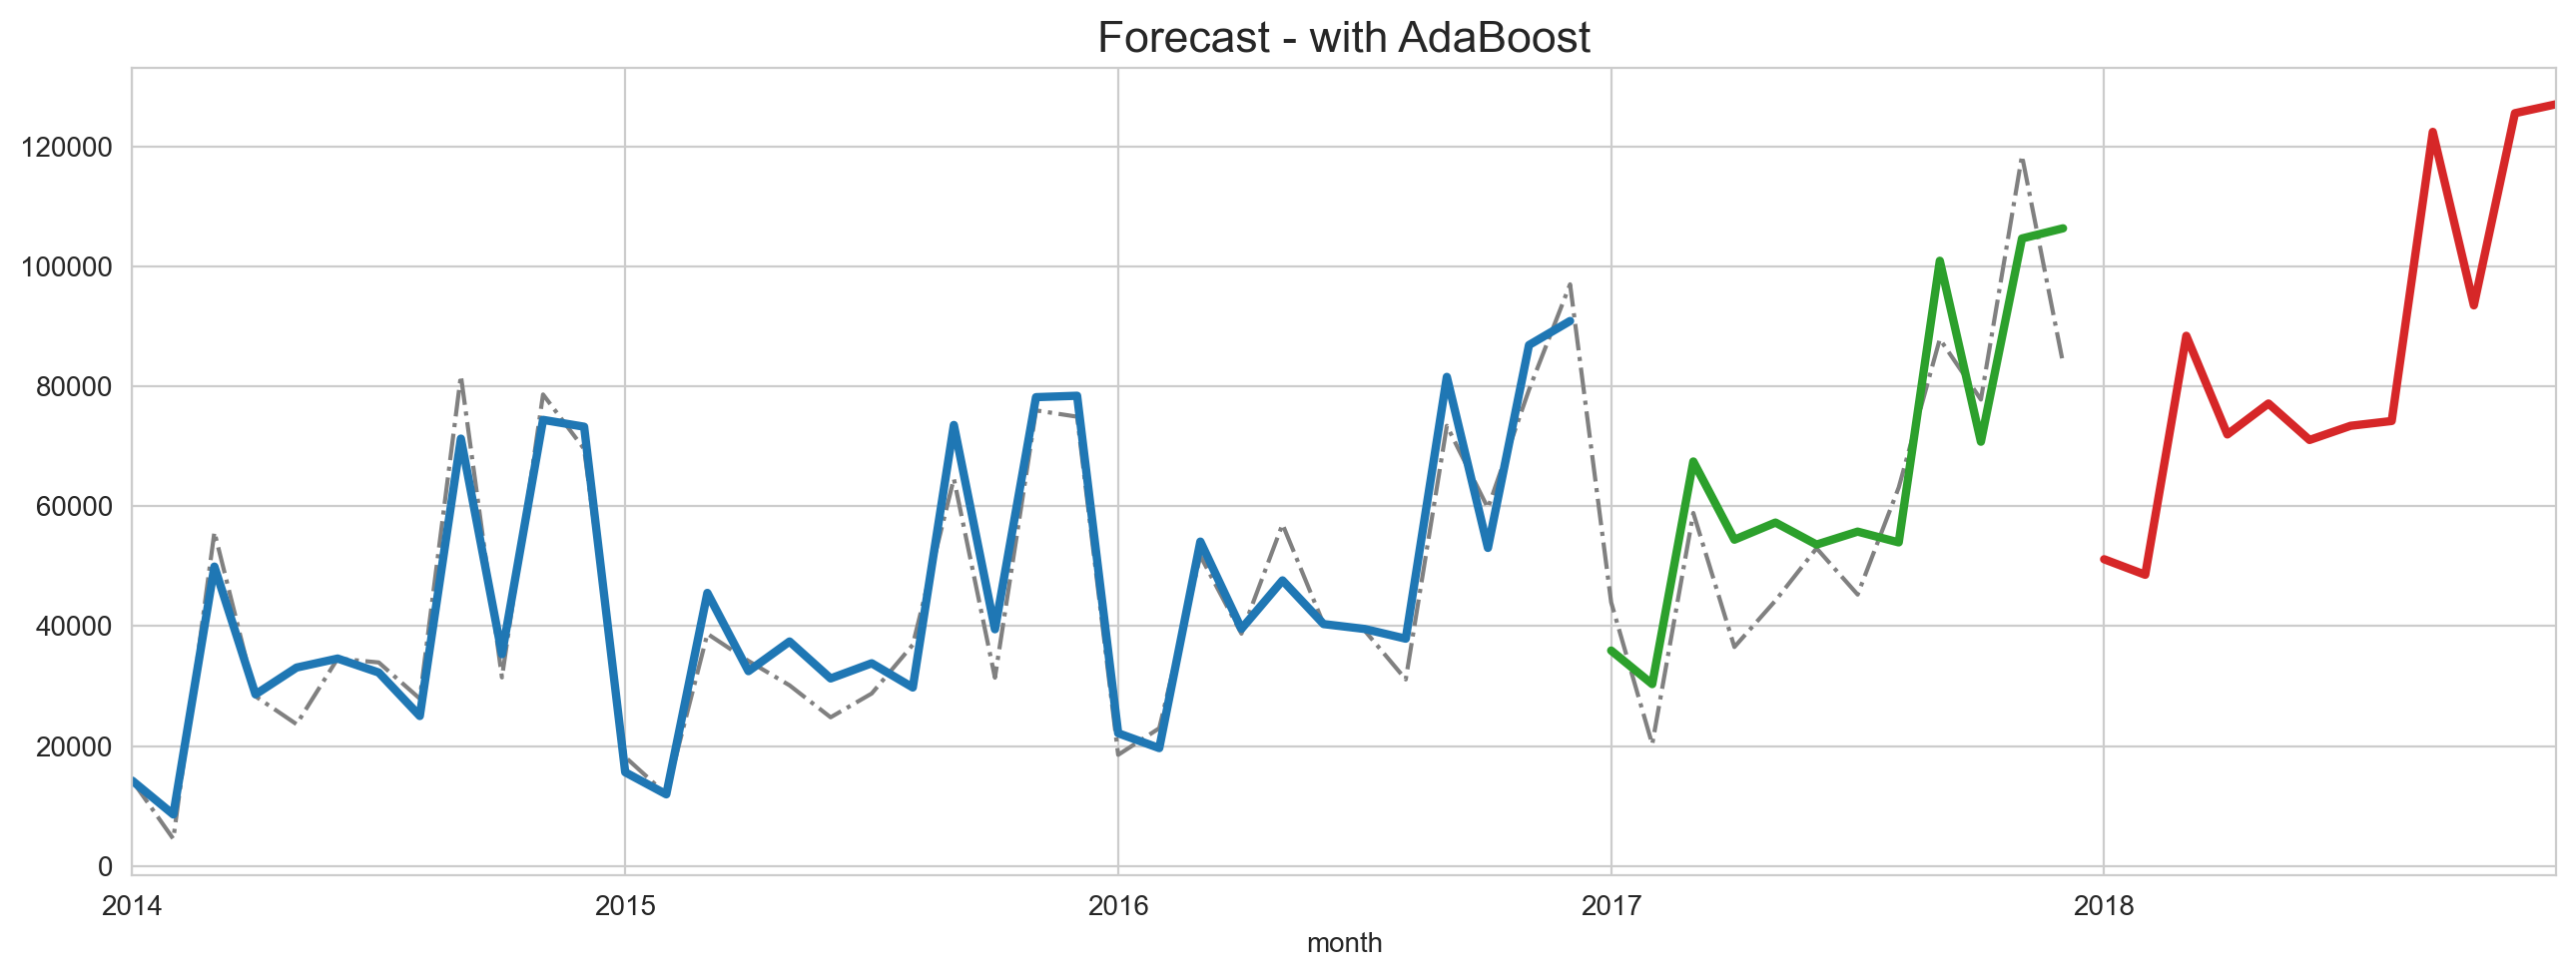

In [146]:
ax = y.plot(style="-.", color="0.5", title="Forecast - with AdaBoost")
ax = y_pred3.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred4.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')

In [147]:
r2_4 = r2_score(y_test, y_pred4)
mae_4 = mean_absolute_error(y_test, y_pred4)
mse_4 = mean_squared_error(y_test, y_pred4)
rmse_4 = sqrt(mse_4)
msle_4 = mean_squared_log_error(y_test,y_pred4)
mape_4 = mean_absolute_percentage_error(y_test, y_pred4)
medae_4 = median_absolute_error(y_test, y_pred4)
me_4 = max_error(y_test, y_pred4)
evs_4 = explained_variance_score(y_test, y_pred4)
mpl_4 = mean_pinball_loss(y_test, y_pred4)
d2t_4 = d2_tweedie_score(y_test, y_pred4)
d2p_4 = d2_pinball_score(y_test, y_pred4)

print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2_4))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae_4))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse_4))
print("Raíz del Error Cuadrático Medio (RMSE): {:.2f}".format(mse_4))
print("Error cuadrático medio del logaritmo (MSLE): {:.2f}".format(msle_4))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape_4))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae_4))
print("Error Máximo (ME): {:.2f}".format(me_4))
print("Varianza Explicada (EVS): {:.2f}".format(evs_4))
print("Pérdida Media de Pinball (MPL): {:.2f}".format(mpl_4))
print("Puntuación Tweedie D^2 (D2T): {:.2f}".format(d2t_4))
print("Puntuación de Pinball D^2 (D2P): {:.2f}".format(d2p_4))

R2 Score (Coeficiente de determinación): 0.77
Error Absoluto Medio (MAE): 11185.61
Error Cuadrático Medio (MSE): 153315308.63
Raíz del Error Cuadrático Medio (RMSE): 153315308.63
Error cuadrático medio del logaritmo (MSLE): 0.05
Error Porcentual Absoluto Medio (MAPE): 0.22
Error Absoluto Mediano (MEDAE): 10263.49
Error Máximo (ME): 22504.21
Varianza Explicada (EVS): 0.80
Pérdida Media de Pinball (MPL): 5592.81
Puntuación Tweedie D^2 (D2T): 0.77
Puntuación de Pinball D^2 (D2P): 0.46


- *R2 Score*: Con un valor de 0.77, el modelo explica aproximadamente el 77% de la variabilidad en los datos de ventas. Esto sugiere que el modelo tiene un buen ajuste a los datos y captura una cantidad significativa de la variabilidad en las ventas.

- *Error Absoluto Medio (MAE) y Error Cuadrático Medio (MSE)*: Con un MAE de 11185 y un MSE de 153315308, los errores promedio y cuadráticos son relativamente bajos en comparación con la escala de los datos de ventas. Esto indica que las predicciones del modelo están, en promedio, cerca de los valores reales y que el modelo tiene una buena capacidad para predecir las ventas.

- *Error Porcentual Absoluto Medio (MAPE)*: Con un MAPE de 0.22, el modelo tiene un error porcentual medio del 22%, lo que indica que las predicciones tienen un buen ajuste a la escala de las ventas y que el modelo está realizando predicciones precisas en términos relativos.

- *Varianza Explicada (EVS)*: Con un valor de 0.80, la varianza explicada sugiere que el modelo explica el 80% de la varianza total en los datos de ventas. Esto respalda la idea de que el modelo tiene un buen ajuste a los datos y captura una cantidad significativa de la variabilidad en las ventas.

## Conclusión

El nivel de error de la regresión lineal con AdaBoost, en comparación con los resultados anteriores, señala una mejora general en la precisión del modelo. Esto se evidencia por la mejora en métricas clave de rendimiento, como el R2 Score y el MAE, indicando que el modelo ahora explica una mayor proporción de la variabilidad presente en los datos.
Entonces las ventas futuras para los cada mes del 2018 son:

- 01-2018   Ventas: $51.152
- 02-2018   Ventas: $48.562
- 03-2018   Ventas: $88.409
- 04-2018   Ventas: $71.958
- 05-2018   Ventas: $77.124
- 06-2018   Ventas: $71.040
- 07-2018   Ventas: $73.405
- 08-2018   Ventas: $74.204
- 09-2018   Ventas: $122.416
- 10-2018   Ventas: $93.483
- 11-2018   Ventas: $125.529
- 12-2018   Ventas: $127.017